# FNG-ITER Neutron Streaming Benchmark

Traduction of the MCNP input for the FNG-ITER neutron streaming benchmark into OpenMC API input.

In [1]:
'''
Nb, Al, Ni activation foils:
d = 1.8 cm
t = 0.1 cm
number of atoms = (3.0630e+22, Nb), (1.5335e+22, Al), (2.3258e+22, Ni)

Au activation foils:
d = 1.8 cm
t = 5e-3 cm
number of atoms = (7.5078e+20, Au)
'''

'\nNb, Al, Ni activation foils:\nd = 1.8 cm\nt = 0.1 cm\nnumber of atoms = (3.0630e+22, Nb), (1.5335e+22, Al), (2.3258e+22, Ni)\n\nAu activation foils:\nd = 1.8 cm\nt = 5e-3 cm\nnumber of atoms = (7.5078e+20, Au)\n'

In [2]:
# import section
import math
import numpy as np
import matplotlib.pyplot as plt
import openmc
import fng_source_froutine

In [3]:
off_axis = False

In [4]:
# cross_sections_path = r'/home/segantin/openmc_models/CROSS_SECTIONS/endfb80_hdf5/cross_sections.xml'
# cross_sections_path = r'/home/segantin/openmc_models/CROSS_SECTIONS/fendl-3.2-hdf5/cross_sections.xml'
cross_sections_path = r'/home/segantin/openmc_models/CROSS_SECTIONS/fendl-3.2b-hdf5/cross_sections.xml'
openmc.config['cross_sections'] = cross_sections_path

In [5]:
# parameters

# rotations and translations
t1x = 0  # cm - translation along x
t1y = 0  # cm - translation along y 
t1z = 0  # cm - translation along z
r1phi = 0  # deg - rotation around x
r1theta = 0  # deg - rotation around y
r1psi = 45  # deg - rotation around z 45
t2x = 0  # cm - translation along x -     ON-AXIS
t2y = 0.15  # cm - translation along y 0.15
t2z = 0  # cm - translation along z
r2phi = 0  # deg - rotation around x
r2theta = -45  # deg - rotation around y -45
r2psi = 0  # deg - rotation around z
# 
t3x = 0.  # cm - translation along x
t3y = 0.  # cm - translation along y
t3z = 0.  # cm - translation along z

if off_axis == True:
    # Off-axis
    t2x = -5.3  # adjustement to translation number 2
    #
    t3x = -5.3  # cm - translation along x -     ON-AXIS
    t3y = 0.  # cm - translation along y 0.15
    t3z = 0.  # cm - translation along z

# transformations
r1 = (r1phi, r1theta, r1psi)  # for rotation matrix
r2 = (r2phi, r2theta, r2psi)  # for rotation matrix
t1 = (t1x, t1y, t1z)  # translation vector
t2 = (t2x, t2y, t2z)  # translation vector
# off axis translation
t3 = (t3x, t3y, t3z)  # translation vector

In [6]:
# MATERIALS
# materials for experimental setup
# m1 Stainless Steel SS (AISI-316)  # we are at 98.097 of weight composition
aisi316 = openmc.Material(material_id=1, name='aisi316')
aisi316.add_element('B', 0.00315, 'wo')
aisi316.add_element('C', 0.04, 'wo')
aisi316.add_element('Si', 0.41, 'wo')
aisi316.add_element('V', 0.16, 'wo')
aisi316.add_element('Cr', 15.194, 'wo')
aisi316.add_element('Mn', 1.14, 'wo')
aisi316.add_element('Fe', 68.11, 'wo')
aisi316.add_element('Co', 0.14, 'wo')
aisi316.add_element('Ni', 10.69, 'wo')
aisi316.add_element('Mo', 2.12, 'wo')
aisi316.add_element('Cu', 0.09, 'wo')
aisi316.set_density('g/cm3', 7.954)

# # m1 Stainless Steel SS (AISI-316)  # from the "eff-639.pdf" file, 99.7765% of weight composition
# aisi316 = openmc.Material(material_id=1, name='aisi316')
# aisi316.add_element('C', 0.04, 'wo')
# aisi316.add_element('Si', 0.45, 'wo')
# aisi316.add_element('V', 0.16, 'wo')
# aisi316.add_element('Cr', 16.8, 'wo')
# aisi316.add_element('Mn', 1.14, 'wo')
# aisi316.add_element('Fe', 68.1, 'wo')
# aisi316.add_element('Co', 0.14, 'wo')
# aisi316.add_element('Ni', 10.7, 'wo')
# aisi316.add_element('Mo', 2.12, 'wo')
# aisi316.add_element('Cu', 0.09, 'wo')
# aisi316.add_element('S', 0.006, 'wo')
# aisi316.add_element('P', 0.022, 'wo')
# aisi316.add_element('Sn', 0.004, 'wo')
# aisi316.add_element('Pb', 0.001, 'wo')
# aisi316.add_element('B', 0.0035, 'wo')
# aisi316.set_density('g/cm3', 7.89)

# m2 H2O
water = openmc.Material(material_id=2, name='cool_water')
water.add_element('H', 2, 'ao')
water.add_element('O', 1, 'ao')
water.set_density('g/cm3', 1.0)
# m3 Copper
copper = openmc.Material(material_id=3, name='cu')
copper.add_element('Cu', 1.0, 'ao')
copper.set_density('g/cm3', 8.94)
# m4 Air
air = openmc.Material(material_id=4, name='air')
air.add_element('N', .788903, 'ao')
air.add_element('O', .211097, 'ao')
air.set_density('atom/b-cm', 4.614e-5)
# # m4 air
# air = openmc.Material(material_id=4, name='air')
# air.add_element('N', 0.78, 'ao')
# air.add_element('O', 0.22, 'ao')
# air.add_element('Ar', 0.01, 'ao')
# air.set_density('g/cm3', 1.225e-3)
# m5 Perspex
perspex = openmc.Material(material_id=5, name='perspex')
perspex.add_element('H', 8, 'ao')
perspex.add_element('C', 5, 'ao')
perspex.add_element('O', 2, 'ao')
perspex.set_density('g/cm3', 1.182)
# m6 CH2 Polyethilene
ch2 = openmc.Material(material_id=6, name='ch2')
ch2.add_element('H', 2, 'ao')
ch2.add_element('C', 1, 'ao')
ch2.set_density('g/cm3', 0.94)
# # m7 Activation foil material
# act_foil = openmc.Material(material_id=7, name='act_foil')
# act_foil.add_nuclide('Al27', 1.0, 'ao')
# act_foil.set_density('g/cm3', 2.7)

# m8 Concrete + 5% Fe  dens. 2.6  # we are at 0.897043 fo weight composition
concrete = openmc.Material(material_id=8, name='concrete') 
concrete.add_element('H', 0.005358, 'wo')
concrete.add_element('O', 0.474193, 'wo')
concrete.add_element('Na', 0.016312, 'wo')
concrete.add_element('Al', 0.043491, 'wo')
concrete.add_element('Si', 0.299658, 'wo')
concrete.add_element('K', 0.018031, 'wo')
concrete.add_element('Fe', 0.04, 'wo')
concrete.set_density('g/cm3', 2.6)

# # density modified materials
# # m7-mod Activation foil in the inner box material
# act_foil_box = openmc.Material(material_id=17, name='act_foil_box')
# act_foil_box.add_nuclide('Al27', 1.0, 'ao')
# act_foil_box.set_density('g/cm3', 7.954)

# modified for openmc

# # m7 Activation foil material
# act_foil = openmc.Material(material_id=7, name='act_foil')
# act_foil.add_nuclide('Ni58', 18.57, 'ao')
# act_foil.set_density('g/cm3', 8.908)
# # m7-mod Activation foil in the inner box material
# act_foil_box = openmc.Material(material_id=17, name='act_foil_box')
# act_foil_box.add_nuclide('Ni58', 1.0, 'ao')
# act_foil_box.set_density('g/cm3', 8.908)

# Dosimetric materials
# m131
al27 = openmc.Material(material_id=131, name='Al27')
al27.add_element('Al', 1.0, 'ao')
al27.set_density('g/cm3', 2.7)
# m281
ni58 = openmc.Material(material_id=281, name='Ni58')
ni58.add_element('Ni', 1.0, 'ao')
# ni58.add_nuclide('Ni58', 1.0, 'ao')
ni58.set_density('g/cm3', 8.908)
# m411
nb93 = openmc.Material(material_id=411, name='Nb93')
# nb93.add_nuclide('Nb93', 1.0, 'ao')
nb93.add_element('Nb', 1.0, 'ao')
nb93.set_density('g/cm3', 8.57)
# m791 Au-197(n,g)Au-198
au197 = openmc.Material(material_id=791, name='Au197')
au197.add_element('Au', 1.0, 'ao')
au197.set_density('g/cm3', 19.3)
# m999 - CaF2 nuclear heating dosimeter TLD-300
caf2 = openmc.Material(material_id=999, name='caf2')
caf2.add_element('Ca', 1.0, 'ao')
caf2.add_element('F', 2.0, 'ao')
caf2.set_density('g/cm3', 3.18)

act_foil = openmc.Material.mix_materials([nb93, al27, ni58, au197, air, caf2], [0, 0, 0, 0.005, 0.995, 0], 'vo')
act_foil_box = openmc.Material.mix_materials([nb93, al27, ni58, au197, air, caf2], [0, 0, 0, 0.005, 0.995, 0], 'vo')

# setting temperatures
# instantiate material collection
materials = openmc.Materials([aisi316, water, copper, air, perspex, ch2, act_foil, concrete, act_foil_box, al27, ni58, nb93, au197, caf2])

# export to XML
materials.export_to_xml()

In [7]:
# GEOMETRY

# SURFACES

# Target surfaces
py_1 = openmc.YPlane(y0=0.0, name='py_1').translate(t3)
py_2 = openmc.YPlane(y0=0.1, name='py_2').translate(t3)
py_3 = openmc.YPlane(y0=0.2, name='py_3').translate(t3)
py_4 = openmc.YPlane(y0=0.35, name='py_4').translate(t3)
py_5 = openmc.YPlane(y0=49.17, name='py_5').translate(t3)
py_6 = openmc.YPlane(y0=-1.9, name='py_6').translate(t3)
cy_7 = openmc.YCylinder(x0=0.0, z0=0.0, r=1.5, name='cy_7').translate(t3)
cy_8 = openmc.YCylinder(x0=0.0, z0=0.0, r=1.6, name='cy_8').translate(t3)
cy_9 = openmc.YCylinder(x0=0.0, z0=0.0, r=1.7, name='cy_9').translate(t3)
cy_10 = openmc.YCylinder(x0=0.0, z0=0.0, r=1.8, name='cy_10').translate(t3)
cy_11 = openmc.YCylinder(x0=0.0, z0=0.0, r=2.4, name='cy_11').translate(t3)
py_12 = openmc.YPlane(y0=-13.5, name='py_12').translate(t3)
py_13 = openmc.YPlane(y0=-4.0, name='py_13').translate(t3)
cx_14 = openmc.XCylinder(y0=0.0, z0=0, r=1.13, name='cx_14').rotate(r2).translate(t2)  # tr2
cx_15 = openmc.XCylinder(y0=0.0, z0=0, r=1.4, name='cx_15').rotate(r2).translate(t2)  # tr2
px_16 = openmc.XPlane(x0=2.0, name='px_16').rotate(r2).translate(t2)  # tr2
px_17 = openmc.XPlane(x0=-2.0, name='px_17').rotate(r2).translate(t2)  # tr2

# Planes for the pot and the exterior
cy_19 = openmc.YCylinder(x0=0.0, z0=0.0, r=17.7, name='cy_29').translate(t3)
py_20 = openmc.YPlane(y0=-8.4, name='py_20').translate(t3)
py_21 = openmc.YPlane(y0=-14.1, name='py_21').translate(t3)
# p_22 = openmc.Plane.from_points((2.0, 0.05, 0.0), (6.15, 1.3, 0.0), (2.0, 0.05, 3.0), name='p_22').rotate(r2).translate(t2)  # tr2
# p_23 = openmc.Plane.from_points((2.0, 0.20, 0.0), (6.15, 1.4, 0.0), (2.0, 0.20, 3.0), name='p_23').rotate(r2).translate(t2)  # tr2
# p_24 = openmc.Plane.from_points((2.0, -0.05, 0.0), (6.15, -1.3, 0.0), (2.0, -0.05, 3.0), name='p_24').rotate(r2).translate(t2)  # tr2
# p_25 = openmc.Plane.from_points((2.0, -0.15, 0.0), (6.15, -1.4, 0.0), (2.0, -0.15, 3.0), name='p_25').rotate(r2).translate(t2)  # tr2
# p_26 = openmc.Plane.from_points((-2.0, 0.05, 0.0), (-6.15, 1.3, 0.0), (-2.0, 0.05, 3.0), name='p_26').rotate(r2).translate(t2)  # tr2
# p_27 = openmc.Plane.from_points((-2.0, 0.20, 0.0), (-6.15, 1.4, 0.0), (-2.0, 0.20, 3.0), name='p_27').rotate(r2).translate(t2)  # tr2
# p_28 = openmc.Plane.from_points((-2.0, -0.05, 0.0), (-6.15, -1.3, 0.0), (-2.0, -0.05, 3.0), name='p_28').rotate(r2).translate(t2)  # tr2
# p_29 = openmc.Plane.from_points((-2.0, -0.15, 0.0), (-6.15, -1.4, 0.0), (-2.0, -0.15, 3.0), name='p_29').rotate(r2).translate(t2)  # tr2
p_22 = openmc.Plane(2.6516504294495524, -12.450000000000001, 2.6516504294495524, 5.01, name='p_22').translate(t3)  # COPIED FROM XML
p_23 = openmc.Plane(2.54558441227157, -12.450000000000001, 2.54558441227157, 2.842499999999999, name='p_23').translate(t3)  # COPIED FROM XML
p_24 = openmc.Plane(2.651650429449554, 12.450000000000001, 2.651650429449554, 8.745, name='p_24').translate(t3)  # COPIED FROM XML
p_25 = openmc.Plane(2.651650429449554, 12.450000000000001, 2.651650429449554, 7.5, name='p_25').translate(t3)  # COPIED FROM XML
p_26 = openmc.Plane(-2.651650429449554, -12.450000000000001, -2.651650429449554, 5.01, name='p_26').translate(t3)  # COPIED FROM XML
p_27 = openmc.Plane(-2.545584412271572, -12.450000000000001, -2.545584412271572, 2.842499999999999, name='p_27').translate(t3)  # COPIED FROM XML
p_28 = openmc.Plane(-2.6516504294495524, 12.450000000000001, -2.6516504294495524, 8.745, name='p_28').translate(t3)  # COPIED FROM XML
p_29 = openmc.Plane(-2.6516504294495524, 12.450000000000001, -2.6516504294495524, 7.5, name='p_29').translate(t3)  # COPIED FROM XML
pz_30 = openmc.ZPlane(z0=2.0, name='pz_30').rotate(r2).translate(t2)  # tr2
pz_31 = openmc.ZPlane(z0=1.9, name='pz_31').rotate(r2).translate(t2)  # tr2
pz_32 = openmc.ZPlane(z0=-1.9, name='pz_32').rotate(r2).translate(t2)  # tr2
pz_33 = openmc.ZPlane(z0=-2.0, name='pz_33').rotate(r2).translate(t2)  # tr2
# p_34 = openmc.Plane.from_points((2.0, 0.0, 1.9), (6.15, 0.0, 1.3), (2.0, 3.0,  1.9), name='p_34').rotate(r2).translate(t2)  # tr2
# p_35 = openmc.Plane.from_points((2.0, 0.0, 2.0), (6.15, 0.0, 1.4), (2.0, 3.0, 2.0), name='p_35').rotate(r2).translate(t2)  # tr2
# p_36 = openmc.Plane.from_points((2.0, 0.0, -1.9), (6.15, 0.0, -1.3), (2.0, 3.0, -1.9), name='p_36').rotate(r2).translate(t2)  # tr2
# p_37 = openmc.Plane.from_points((2.0, 0.0, -2.0), (6.15, 0.0, -1.4), (2.0, 3.0, -2.0), name='p_37').rotate(r2).translate(t2)  # tr2
# p_38 = openmc.Plane.from_points((-2.0, 0.0, 1.9), (-6.15, 0.0, 1.3), (-2.0, 3.0, 1.9), name='p_38').rotate(r2).translate(t2)  # tr2
# p_39 = openmc.Plane.from_points((-2.0, 0.0, 2.0), (-6.15, 0.0, 1.4), (-2.0, 3.0, 2.0), name='p_39').rotate(r2).translate(t2)  # tr2
# p_40 = openmc.Plane.from_points((-2.0, 0.0, -1.9), (-6.15, 0.0, -1.3), (-2.0, 3.0, -1.9), name='p_40').rotate(r2).translate(t2)  # tr2
# p_41 = openmc.Plane.from_points((-2.0, 0.0, -2.0), (-6.15, 0.0, -1.4), (-2.0, 3.0, -2.0), name='p_41').rotate(r2).translate(t2)  # tr2
p_34 = openmc.Plane(-7.530687219636732, 0, 10.076271631908304, 27.255, name='p_34').translate(t3)  # COPIED FROM XML
p_35 = openmc.Plane(-7.530687219636731, 0, 10.076271631908305, 28.500000000000004, name='p_35').translate(t3)  # COPIED FROM XML
p_36 = openmc.Plane(10.076271631908302, 0, -7.530687219636734, 27.255, name='p_36').translate(t3)  # COPIED FROM XML
p_37 = openmc.Plane(10.076271631908304, 0, -7.530687219636733, 28.500000000000004, name='p_37').translate(t3)  # COPIED FROM XML
p_38 = openmc.Plane(-10.076271631908302, 0, 7.530687219636734, 27.255, name='p_38').translate(t3)  # COPIED FROM XML
p_39 = openmc.Plane(-10.076271631908304, 0, 7.530687219636733, 28.500000000000004, name='p_39').translate(t3)  # COPIED FROM XML
p_40 = openmc.Plane(7.530687219636732, 0, -10.076271631908304, 27.255, name='p_40').translate(t3)  # COPIED FROM XML
p_41 = openmc.Plane(7.530687219636731, 0, -10.076271631908305, 28.500000000000004, name='p_41').translate(t3)  # COPIED FROM XML
px_42 = openmc.XPlane(x0=6.15, name='px_42').rotate(r2).translate(t2)  # tr2
px_43 = openmc.XPlane(x0=-6.15, name='px_43').rotate(r2).translate(t2)  # tr2

# Surfaces for the water junctions
px_44 = openmc.XPlane(x0=7.45, name='px_44').rotate(r2).translate(t2)  # tr2
px_45 = openmc.XPlane(x0=-7.45, name='px_45').rotate(r2).translate(t2)  # tr2
px_46 = openmc.XPlane(x0=10.05, name='px_46').rotate(r2).translate(t2)  # tr2
px_47 = openmc.XPlane(x0=-10.05, name='px_47').rotate(r2).translate(t2)  # tr2
px_48 = openmc.XPlane(x0=11.45, name='px_48').rotate(r2).translate(t2)  # tr2
px_49 = openmc.XPlane(x0=-11.45, name='px_49').rotate(r2).translate(t2)  # tr2
coy_50 = openmc.YCylinder(x0=13.0, z0=0.0, r=1.4, name='coy_50').rotate(r2).translate(t2)  # tr2
coy_51 = openmc.YCylinder(x0=13.0, z0=0.0, r=1.5, name='coy_51').rotate(r2).translate(t2)  # tr2
coy_53 = openmc.YCylinder(x0=13.0, z0=0.0, r=2.1, name='coy_53').rotate(r2).translate(t2)  # tr2
coy_54 = openmc.YCylinder(x0=-13.0, z0=0.0, r=1.4, name='coy_54').rotate(r2).translate(t2)  # tr2
coy_55 = openmc.YCylinder(x0=-13.0, z0=0.0, r=1.5, name='coy_55').rotate(r2).translate(t2)  # tr2
coy_56 = openmc.YCylinder(x0=-13.0, z0=0.0, r=2.1, name='coy_56').rotate(r2).translate(t2)  # tr2
cx_57 = openmc.XCylinder(y0=0.0, z0=0.0, r=1.75, name='cx_57').rotate(r2).translate(t2)  # tr2
px_58 = openmc.XPlane(x0=14.35, name='px_58').rotate(r2).translate(t2)  # tr2
px_59 = openmc.XPlane(x0=-14.35, name='px_59').rotate(r2).translate(t2)  # tr2
px_60 = openmc.XPlane(x0=14.15, name='px_60').rotate(r2).translate(t2)  # tr2
px_61 = openmc.XPlane(x0=-14.15, name='px_61').rotate(r2).translate(t2)  # tr2
py_62 = openmc.YPlane(y0=1.45, name='py_62').rotate(r2).translate(t2)  # tr2
py_63 = openmc.YPlane(y0=1.25, name='py_63').rotate(r2).translate(t2)  # tr2
py_64 = openmc.YPlane(y0=-1.45, name='py_64').rotate(r2).translate(t2)  # tr2
pz_65 = openmc.ZPlane(z0=1.45, name='pz_65').rotate(r2).translate(t2)  # tr2
pz_66 = openmc.ZPlane(z0=1.25, name='pz_66').rotate(r2).translate(t2)  # tr2
pz_67 = openmc.ZPlane(z0=-1.25, name='pz_67').rotate(r2).translate(t2)  # tr2
pz_68 = openmc.ZPlane(z0=-1.45, name='pz_68').rotate(r2).translate(t2)  # tr2

# Polyethilene block
px_70 = openmc.XPlane(x0=-63.5, name='px_70')
px_71 = openmc.XPlane(x0=63.5, name='px_71')
py_72 = openmc.YPlane(y0=66.56, name='py_72')
pz_73 = openmc.ZPlane(z0=-59.5, name='pz_73')
pz_74 = openmc.ZPlane(z0=59.5, name='pz_74')
pz_75 = openmc.ZPlane(z0=67.5, name='pz_75')

py_76 = openmc.YPlane(y0=151.56, name='py_76')
pz_77 = openmc.ZPlane(z0=-28.5, name='pz_77')
pz_78 = openmc.ZPlane(z0=28.5, name='pz_78')
pz_79 = openmc.ZPlane(z0=-38.5, name='pz_79')
pz_80 = openmc.ZPlane(z0=38.5, name='pz_80')
pz_81 = openmc.ZPlane(z0=-54.5, name='pz_81')
pz_82 = openmc.ZPlane(z0=54.5, name='pz_82')
py_83 = openmc.YPlane(y0=135.36, name='py_83')
py_84 = openmc.YPlane(y0=140.36, name='py_84')
px_85 = openmc.XPlane(x0=-28.5, name='px_85')
px_86 = openmc.XPlane(x0=28.5, name='px_86')
px_87 = openmc.XPlane(x0=-38.5, name='px_87')
px_88 = openmc.XPlane(x0=38.5, name='px_88')
px_89 = openmc.XPlane(x0=-54.5, name='px_89')
px_90 = openmc.XPlane(x0=54.5, name='px_90')

# Box inner wall plane
py_91 = openmc.YPlane(y0=44.37, name='py_91')

# Limit planes for the perspex block - ss
px_92 = openmc.XPlane(x0=-49.5, name='px_92')
px_93 = openmc.XPlane(x0=+49.5, name='px_93')
pz_94 = openmc.ZPlane(z0=-49.2, name='pz_94')
pz_95 = openmc.ZPlane(z0=+49.2, name='pz_95')

# Limit planes for the Cu block - ss
px_96 = openmc.XPlane(x0=-23.5, name='px_96')
px_97 = openmc.XPlane(x0=23.5, name='px_97')
pz_98 = openmc.ZPlane(z0=-23.5, name='pz_98')
pz_99 = openmc.ZPlane(z0=23.5, name='pz_99')

# From the first Cu layer ahead
py_101 = openmc.YPlane(y0=5.3, name='py_101')
py_102 = openmc.YPlane(y0=6.3, name='py_102')
py_103 = openmc.YPlane(y0=11.25, name='py_103')
py_104 = openmc.YPlane(y0=13.31, name='py_104')
py_105 = openmc.YPlane(y0=18.11, name='py_105')
py_106 = openmc.YPlane(y0=20.17, name='py_106')
py_107 = openmc.YPlane(y0=24.82, name='py_107')
py_108 = openmc.YPlane(y0=26.88, name='py_108')
py_109 = openmc.YPlane(y0=31.23, name='py_109')
py_110 = openmc.YPlane(y0=33.29, name='py_110')
py_111 = openmc.YPlane(y0=38.09, name='py_111')
py_112 = openmc.YPlane(y0=44.27, name='py_112')
py_113 = openmc.YPlane(y0=49.27, name='py_113')
py_114 = openmc.YPlane(y0=54.27, name='py_114')
py_115 = openmc.YPlane(y0=56.33, name='py_115')
py_116 = openmc.YPlane(y0=61.23, name='py_116')
py_117 = openmc.YPlane(y0=63.29, name='py_117')
py_118 = openmc.YPlane(y0=67.94, name='py_118')
py_119 = openmc.YPlane(y0=70.00, name='py_119')
py_120 = openmc.YPlane(y0=74.95, name='py_120')
py_121 = openmc.YPlane(y0=77.01, name='py_121')
py_122 = openmc.YPlane(y0=81.77, name='py_122')
py_123 = openmc.YPlane(y0=83.83, name='py_123')
py_124 = openmc.YPlane(y0=88.43, name='py_124')
py_125 = openmc.YPlane(y0=90.49, name='py_125')
py_126 = openmc.YPlane(y0=95.39, name='py_126')
py_127 = openmc.YPlane(y0=99.56, name='py_127')

# Cu Perspex block
py_150 = openmc.YPlane(y0=101.76, name='py_150')
py_151 = openmc.YPlane(y0=103.96, name='py_151')
py_152 = openmc.YPlane(y0=106.16, name='py_152')
py_153 = openmc.YPlane(y0=108.36, name='py_153')
py_154 = openmc.YPlane(y0=110.56, name='py_154')
py_155 = openmc.YPlane(y0=112.76, name='py_155')
py_156 = openmc.YPlane(y0=114.96, name='py_156')
py_157 = openmc.YPlane(y0=117.16, name='py_157')
py_158 = openmc.YPlane(y0=119.36, name='py_158')
py_159 = openmc.YPlane(y0=121.56, name='py_159')
py_160 = openmc.YPlane(y0=123.76, name='py_160')
py_161 = openmc.YPlane(y0=125.96, name='py_161')
py_162 = openmc.YPlane(y0=128.16, name='py_162')
py_163 = openmc.YPlane(y0=130.36, name='py_163')

# End of the Cu Perspex block
cy_201 = openmc.YCylinder(x0=0.0, z0=0.0, r=1.5, name='cy_201')
cy_202 = openmc.YCylinder(x0=0.0, z0=0.0, r=5.5, name='cy_202')
cy_203 = openmc.YCylinder(x0=0.0, z0=0.0, r=9., name='cy_203')
cy_204 = openmc.YCylinder(x0=0.0, z0=0.0, r=13., name='cy_204')
cy_205 = openmc.YCylinder(x0=0.0, z0=0.0, r=17.5, name='cy_205')
cy_206 = openmc.YCylinder(x0=0.0, z0=0.0, r=22.5, name='cy_206')
cy_207 = openmc.YCylinder(x0=0.0, z0=0.0, r=28., name='cy_207')
cy_208 = openmc.YCylinder(x0=0.0, z0=0.0, r=34., name='cy_208')
cy_209 = openmc.YCylinder(x0=0.0, z0=0.0, r=40.5, name='cy_209')
cy_210 = openmc.YCylinder(x0=0.0, z0=0.0, r=47.5, name='cy_210')

cy_301 = openmc.YCylinder(x0=0.0, z0=0.0, r=1.4, name='cy_301')
cy_302 = openmc.YCylinder(x0=0.0, z0=0.0, r=0.9, name='cy_302')
pz_303 = openmc.ZPlane(z0=2.6, name='pz_303')
pz_304 = openmc.ZPlane(z0=-2.6, name='pz_304')
px_305 = openmc.XPlane(x0=7.4, name='px_305')
px_306 = openmc.XPlane(x0=-7.4, name='px_306')
py_307 = openmc.YPlane(y0=51.55, name='py_307')
py_308 = openmc.YPlane(y0=58.50, name='py_308')
py_309 = openmc.YPlane(y0=65.25, name='py_309')
py_310 = openmc.YPlane(y0=72.10, name='py_310')
py_311 = openmc.YPlane(y0=79.05, name='py_311')
py_312 = openmc.YPlane(y0=85.75, name='py_312')
py_313 = openmc.YPlane(y0=92.40, name='py_313')
py_314 = openmc.YPlane(y0=96.80, name='py_314')
sy_315 = openmc.Sphere(x0=0, y0=100.82, z0=0, r=0.8, name='sy_315')
sy_316 = openmc.Sphere(x0=0, y0=103.02, z0=0, r=0.8, name='sy_316')
sy_317 = openmc.Sphere(x0=0, y0=105.22, z0=0, r=0.8, name='sy_317')
sy_318 = openmc.Sphere(x0=0, y0=107.42, z0=0, r=0.8, name='sy_318')
sy_319 = openmc.Sphere(x0=0, y0=109.62, z0=0, r=0.8, name='sy_319')
sy_320 = openmc.Sphere(x0=0, y0=111.82, z0=0, r=0.8, name='sy_320')
sy_321 = openmc.Sphere(x0=0, y0=113.86, z0=0, r=0.8, name='sy_321')
sy_322 = openmc.Sphere(x0=0, y0=116.06, z0=0, r=0.8, name='sy_322')
sy_323 = openmc.Sphere(x0=0, y0=118.26, z0=0, r=0.8, name='sy_323')
sy_324 = openmc.Sphere(x0=0, y0=120.46, z0=0, r=0.8, name='sy_324')
sy_325 = openmc.Sphere(x0=0, y0=122.66, z0=0, r=0.8, name='sy_325')
sy_326 = openmc.Sphere(x0=0, y0=124.86, z0=0, r=0.8, name='sy_326')
sy_327 = openmc.Sphere(x0=0, y0=127.06, z0=0, r=0.8, name='sy_327')
sy_328 = openmc.Sphere(x0=0, y0=129.26, z0=0, r=0.8, name='sy_328')

# Activation foils surfaces
py_329 = openmc.YPlane(y0=51.75, name='py_329')
py_330 = openmc.YPlane(y0=58.70, name='py_330')
py_331 = openmc.YPlane(y0=65.45, name='py_331')
py_332 = openmc.YPlane(y0=72.30, name='py_332')
py_333 = openmc.YPlane(y0=79.35, name='py_333')
py_334 = openmc.YPlane(y0=86.05, name='py_334')
py_335 = openmc.YPlane(y0=92.70, name='py_335')
py_336 = openmc.YPlane(y0=97.10, name='py_336')

py_340 = openmc.YPlane(y0=5.5, name='py_340')
py_341 = openmc.YPlane(y0=5.6, name='py_341')
py_342 = openmc.YPlane(y0=18.2, name='py_342')
py_343 = openmc.YPlane(y0=18.3, name='py_343')
py_344 = openmc.YPlane(y0=31.24, name='py_344')
py_345 = openmc.YPlane(y0=31.34, name='py_345')
py_346 = openmc.YPlane(y0=43.9, name='py_346')
py_347 = openmc.YPlane(y0=44.0, name='py_347')
coy_348 = openmc.YCylinder(x0=-3.7, z0=0.0, r=0.9, name='coy_348')
coy_349 = openmc.YCylinder(x0=3.7, z0=0.0, r=0.9, name='coy_349')
cox_350 = openmc.XCylinder(y0=46.77, z0=0.0, r=0.9, name='coy_350')
coz_351 = openmc.ZCylinder(x0=-3.7, y0=46.77, r=0.9, name='coy_351')
coz_352 = openmc.ZCylinder(x0=3.7, y0=46.77, r=0.9, name='coy_352')
py_353 = openmc.YPlane(y0=49.07, name='py_353')
py_354 = openmc.YPlane(y0=44.47, name='py_354')
px_355 = openmc.XPlane(x0=7.3, name='px_355')
px_356 = openmc.XPlane(x0=-7.3, name='px_356')
pz_357 = openmc.ZPlane(z0=2.5, name='pz_357')
pz_358 = openmc.ZPlane(z0=-2.5, name='pz_358')

# Wall surfaces
px_400 = openmc.XPlane(x0=-570, name='px_400').rotate(r1).translate(t1)  # tr1
px_401 = openmc.XPlane(x0=570, name='px_401').rotate(r1).translate(t1)  # tr1
py_402 = openmc.YPlane(y0=-760, name='py_402').rotate(r1).translate(t1)  # tr1
py_403 = openmc.YPlane(y0=480, name='py_403').rotate(r1).translate(t1)  # tr1
pz_404 = openmc.ZPlane(z0=-406, name='pz_404')
pz_405 = openmc.ZPlane(z0=530, name='pz_405')

px_410 = openmc.XPlane(x0=-572, name='px_410').rotate(r1).translate(t1)  # tr1
px_411 = openmc.XPlane(x0=572, name='px_411').rotate(r1).translate(t1)  # tr1
py_412 = openmc.YPlane(y0=-762, name='py_412').rotate(r1).translate(t1)  # tr1
py_413 = openmc.YPlane(y0=482, name='py_413').rotate(r1).translate(t1)  # tr1
pz_414 = openmc.ZPlane(z0=-408, name='pz_414')
pz_415 = openmc.ZPlane(z0=532, name='pz_415')

px_420 = openmc.XPlane(x0=-576, name='px_420').rotate(r1).translate(t1)  # tr1
px_421 = openmc.XPlane(x0=576, name='px_421').rotate(r1).translate(t1)  # tr1
py_422 = openmc.YPlane(y0=-766, name='py_422').rotate(r1).translate(t1)  # tr1
py_423 = openmc.YPlane(y0=486, name='py_423').rotate(r1).translate(t1)  # tr1
pz_424 = openmc.ZPlane(z0=-412, name='pz_424')
pz_425 = openmc.ZPlane(z0=536, name='pz_425')

px_430 = openmc.XPlane(x0=-582, name='px_430').rotate(r1).translate(t1)  # tr1
px_431 = openmc.XPlane(x0=582, name='px_431').rotate(r1).translate(t1)  # tr1
py_432 = openmc.YPlane(y0=-772, name='py_432').rotate(r1).translate(t1)  # tr1
py_433 = openmc.YPlane(y0=492, name='py_403').rotate(r1).translate(t1)  # tr1
pz_434 = openmc.ZPlane(z0=-418, name='pz_434')
pz_435 = openmc.ZPlane(z0=542, name='pz_435')

px_440 = openmc.XPlane(x0=-590, name='px_440').rotate(r1).translate(t1)  # tr1
px_441 = openmc.XPlane(x0=590, name='px_441').rotate(r1).translate(t1)  # tr1
py_442 = openmc.YPlane(y0=-780, name='py_442').rotate(r1).translate(t1)  # tr1
py_443 = openmc.YPlane(y0=500, name='py_443').rotate(r1).translate(t1)  # tr1
pz_444 = openmc.ZPlane(z0=-426, name='pz_444')
pz_445 = openmc.ZPlane(z0=550, name='pz_445')

px_450 = openmc.XPlane(x0=-600, name='px_450').rotate(r1).translate(t1)  # tr1
px_451 = openmc.XPlane(x0=600, name='px_451').rotate(r1).translate(t1)  # tr1
py_452 = openmc.YPlane(y0=-790, name='py_452').rotate(r1).translate(t1)  # tr1
py_453 = openmc.YPlane(y0=510, name='py_453').rotate(r1).translate(t1)  # tr1
pz_454 = openmc.ZPlane(z0=-436, name='pz_454')
pz_455 = openmc.ZPlane(z0=560, name='pz_455')

px_460 = openmc.XPlane(x0=-610, name='px_460').rotate(r1).translate(t1)  # tr1
px_461 = openmc.XPlane(x0=610, name='px_461').rotate(r1).translate(t1)  # tr1
py_462 = openmc.YPlane(y0=-800, name='py_462').rotate(r1).translate(t1)  # tr1
py_463 = openmc.YPlane(y0=520, name='py_463').rotate(r1).translate(t1)  # tr1
pz_464 = openmc.ZPlane(z0=-446, name='pz_464')
pz_465 = openmc.ZPlane(z0=570, name='pz_465')

px_470 = openmc.XPlane(x0=-620, boundary_type='vacuum', name='px_470').rotate(r1).translate(t1)  # tr1
px_471 = openmc.XPlane(x0=620, boundary_type='vacuum', name='px_471').rotate(r1).translate(t1)  # tr1
py_472 = openmc.YPlane(y0=-810, boundary_type='vacuum', name='py_472').rotate(r1).translate(t1)  # tr1
py_473 = openmc.YPlane(y0=530, boundary_type='vacuum', name='py_473').rotate(r1).translate(t1)  # tr1
pz_474 = openmc.ZPlane(z0=-456, boundary_type='vacuum', name='pz_474')
pz_475 = openmc.ZPlane(z0=580, boundary_type='vacuum', name='pz_475')

In [8]:
# GEOMETRY

# Creating regions

# Cu cup
region_1 = +py_6 & (+py_1 | +cy_7) & -py_2 & -cy_8

# Cylindrical water gap
region_2 = +py_6 & +cy_8 & -py_2 & -cy_9

# Steel pieces
region_3 = +py_6 & +cy_9 & -py_1 & -cy_10
region_4 = +py_1 & -py_2 & +cy_9 & -px_16 & +px_17 & -pz_30 & +pz_33

# Front water gap
region_5 = +py_2 & -py_3 & -px_16 & +px_17 & -pz_31 & +pz_32

# Walls around front water gap
region_6 = +py_2 & -py_3 & -px_16 & +px_17 & -pz_30 & +pz_31
region_7 = +py_2 & -py_3 & -px_16 & +px_17 & -pz_32 & +pz_33
region_8 = +py_3 & -py_4 & -px_16 & +px_17 & -pz_30 & +pz_33

# Drift tube
region_9 = -py_6 & +py_12 & +cy_7 & -cy_10

# Drift tube vacuum
region_10 = -py_1 & +py_12 & -cy_7

# Flange
region_11 = -py_6 & +py_13 & +cy_10 & -cy_11

# Upper taped tube water
region_12 = +px_16 & +p_22 & +p_24 & -px_42 & -p_34 & -p_36

# Upper taped tube wall
region_13 = +px_16 & +p_23 & +p_25 & -px_42 & -p_35 & -p_37 & (-p_22 | -p_24 | +p_34 | +p_36)

# Lower taped tube water
region_14 = -px_17 & +p_26 & +p_28 & +px_43 & -p_38 & -p_40

# Lower taped tube wall
region_15 = -px_17 & +p_27 & +p_29 & +px_43 & -p_39 & -p_41 & (-p_26 | -p_28 | +p_38 | +p_40)

# Air between target and pot
region_16 = +py_6 & -px_42 & +px_43 & -pz_30 & +pz_33 & -p_25 & -py_1 & +cy_10 & -p_29

# Air between block and target
region_17 = -py_101 & -px_42 & +px_43 & -pz_30 & +pz_33 & -p_23 & +py_4 & -p_27

# Air around drift tube
region_18 = +py_12 & -py_13 & +cy_10 & -cy_11

# Back region air
region_19 = +py_12 & -py_6 & -cy_19 & +cy_11 & -px_46 & +px_47

# Front region air
region_20 = +py_6 & -py_101 & -cy_19 & (+px_42 | -px_43 | +pz_30 | -pz_33) & -px_48 & +px_49 & +cx_57

# Air for the region right and left to the taped tubes, upper part
region_21 = -px_42 & +px_16 & -pz_30 & +pz_33 & (+p_35 | +p_37) & +p_23 & +p_25

# --------- Upper pipe regions
region_22 = +px_42 & -px_44 & -cx_15 & +cx_14
region_23 = +px_42 & -px_44 & -cx_14
region_24 = +px_42 & -px_44 & -cx_57 & +cx_15
region_25 = -cx_57 & +px_44 & -px_46
region_26 = +px_46 & -px_48 & -cx_15 & +cx_14
region_27 = +px_46 & -px_48 & -cx_14
region_28 = +px_46 & -px_48 & -cx_57 & +cx_15
region_29 = +px_48 & -px_58 & -py_62 & +py_64 & -pz_65 & +pz_68 & (+px_60 | +py_63 | +pz_66 | -pz_67)
region_30 = +px_48 & -px_60 & -py_63 & +py_64 & -pz_66 & +pz_67
region_31 = -py_64 & -coy_50 & +py_12
region_32 = -coy_51 & +coy_50 & -py_64 & +py_20
region_33 =-coy_53 & +coy_50 & +py_12 & -py_20

# --------- Lower pipe regions
region_34 = +px_45 & -px_43 & -cx_15 & +cx_14
region_35 = +px_45 & -px_43 & -cx_14
region_36 = +px_45 & -px_43 & -cx_57 & +cx_15
region_37 = -cx_57 & -px_45 & +px_47
region_38 = +px_49 & -px_47 & -cx_15 & +cx_14
region_39 = +px_49 & -px_47 & -cx_14
region_40 = +px_49 & -px_47 & -cx_57 & +cx_15
region_41 = -px_49 & +px_59 & -py_62 & +py_64 & -pz_65 & +pz_68 & (-px_61 | +py_63 | +pz_66 | -pz_67)
region_42 = -px_49 & +px_61 & -py_63 & +py_64 & -pz_66 & +pz_67
region_43 = -py_64 & -coy_54 & +py_12
region_44 = -coy_55 & +coy_54 & -py_64 & +py_20
region_45 = -coy_56 & +coy_54 & +py_12 & -py_20
region_46 = +py_64 & -py_101 & -cy_19 & +px_48 & (+px_58 | +py_62 | -py_64 | +pz_65 | -pz_68)
region_47 = +py_64 & -py_101 & -cy_19 & -px_49 & (-px_59 | +py_62 | -py_64 | +pz_65 | -pz_68)
region_48 = +py_12 & -py_64 & -cy_19 & +px_46 & ((+coy_51 & +py_20) | (-py_20 & +coy_53)) & (-py_6 | +px_48)
region_49 = +py_12 & -py_64 & -cy_19 & -px_47 & ((+coy_55 & +py_20) | (-py_20 & +coy_56)) & (-py_6 | -px_49)

# Back flange
region_50 = -cy_19 & +py_21 & -py_12

# Exterior air
region_51 = +px_92 & -px_93 & -py_101 & +py_21 & +pz_94 & -pz_95 & +cy_19

# Air for the region right and left to the taped tubes, lower part
region_52 = -px_17 & +px_43 & -pz_30 & +pz_33 & (+p_39 | +p_41) & +p_27 & +p_29

# Air in the bunker
region_654 = +py_402 & -py_403 & +px_400 & -px_401 & +pz_404 & -pz_405 & (+py_76 | -px_70 | +px_71 | -pz_73 | +pz_75 | -py_21)

# polyethilene
region_53 = +px_89 & -px_90 & +py_72 & -py_127 & +pz_81 & -pz_94
region_54 = +px_89 & -px_90 & +py_72 & -py_127 & +pz_95 & -pz_82
region_55 = +px_89 & -px_92 & +py_72 & -py_127 & +pz_94 & -pz_95
region_56 = +px_93 & -px_90 & +py_72 & -py_127 & +pz_94 & -pz_95

region_57 = +px_70 & -px_71 & +py_72 & -py_127 & +pz_73 & -pz_81
region_58 = +px_70 & -px_71 & +py_72 & -py_127 & +pz_82 & -pz_74
region_59 = +px_70 & -px_89 & +py_72 & -py_127 & +pz_81 & -pz_82
region_60 = +px_90 & -px_71 & +py_72 & -py_127 & +pz_81 & -pz_82

region_61 = +px_85 & -px_86 & +py_127 & -py_163 & +pz_77 & -pz_98
region_62 = +px_85 & -px_86 & +py_127 & -py_163 & +pz_99 & -pz_78
region_63 = +px_85 & -px_96 & +py_127 & -py_163 & +pz_98 & -pz_99
region_64 = +px_97 & -px_86 & +py_127 & -py_163 & +pz_98 & -pz_99

region_65 = +px_87 & -px_88 & +py_127 & -py_163 & +pz_79 & -pz_77
region_66 = +px_87 & -px_88 & +py_127 & -py_163 & +pz_78 & -pz_80
region_67 = +px_87 & -px_85 & +py_127 & -py_163 & +pz_77 & -pz_78
region_68 = +px_86 & -px_88 & +py_127 & -py_163 & +pz_77 & -pz_78

region_69 = +px_92 & -px_93 & +py_127 & -py_163 & +pz_94 & -pz_79
region_70 = +px_92 & -px_93 & +py_127 & -py_163 & +pz_80 & -pz_95
region_71 = +px_92 & -px_87 & +py_127 & -py_163 & +pz_79 & -pz_80
region_72 = +px_88 & -px_93 & +py_127 & -py_163 & +pz_79 & -pz_80

region_73 = +px_70 & -px_71 & +py_127 & -py_163 & +pz_73 & -pz_94
region_74 = +px_70 & -px_71 & +py_127 & -py_163 & +pz_95 & -pz_75
region_75 = +px_70 & -px_92 & +py_127 & -py_163 & +pz_94 & -pz_95
region_76 = +px_93 & -px_71 & +py_127 & -py_163 & +pz_94 & -pz_95

region_77 = +px_96 & -px_97 & +py_163 & -py_83 & +pz_98 & -pz_99
region_78 = +px_96 & -px_97 & +py_83 & -py_84 & +pz_98 & -pz_99
region_79 = +px_96 & -px_97 & +py_84 & -py_76 & +pz_98 & -pz_99

region_80 = +px_85 & -px_86 & +py_163 & -py_76 & +pz_77 & -pz_98
region_81 = +px_85 & -px_86 & +py_163 & -py_76 & +pz_99 & -pz_78
region_82 = +px_85 & -px_96 & +py_163 & -py_76 & +pz_98 & -pz_99
region_83 = +px_97 & -px_86 & +py_163 & -py_76 & +pz_98 & -pz_99

region_84 = +px_87 & -px_88 & +py_163 & -py_76 & +pz_79 & -pz_77
region_85 = +px_87 & -px_88 & +py_163 & -py_76 & +pz_78 & -pz_80
region_86 = +px_87 & -px_85 & +py_163 & -py_76 & +pz_77 & -pz_78
region_87 = +px_86 & -px_88 & +py_163 & -py_76 & +pz_77 & -pz_78

region_88 = +px_70 & -px_71 & +py_163 & -py_76 & +pz_73 & -pz_79
region_89 = +px_70 & -px_71 & +py_163 & -py_76 & +pz_80 & -pz_75
region_90 = +px_70 & -px_87 & +py_163 & -py_76 & +pz_79 & -pz_80
region_91 = +px_88 & -px_71 & +py_163 & -py_76 & +pz_79 & -pz_80

# Air around block
region_92 = +px_70 & -px_71 & +py_21 & -py_72 & +pz_95 & -pz_74
region_93 = +px_70 & -px_71 & +py_21 & -py_72 & +pz_73 & -pz_94
region_94 = +px_70 & -px_92 & +py_21 & -py_72 & +pz_94 & -pz_95
region_95 = +px_93 & -px_71 & +py_21 & -py_72 & +pz_94 & -pz_95
region_96 = +px_70 & -px_71 & +py_21 & -py_127 & +pz_74 & -pz_75

# Mock-up and detectors
# 1 Cu layer
region_101 = +py_101 & -py_102 & -cy_301 & (-py_340 | +py_341 | +cy_302)
region_102 = +py_101 & -py_102 & +cy_201 & -cy_202
region_103 = +py_101 & -py_102 & +cy_202 & -cy_203
region_104 = +py_101 & -py_102 & +cy_203 & -cy_204
region_105 = +py_101 & -py_102 & +cy_204 & -cy_205
region_106 = +py_101 & -py_102 & +cy_205 & -cy_206
region_107 = +py_101 & -py_102 & +cy_206 & -cy_207
region_108 = +py_101 & -py_102 & +cy_207 & -cy_208
region_109 = +py_101 & -py_102 & +cy_208 & -cy_209
region_110 = +py_101 & -py_102 & +cy_209 & -cy_210
region_111 = +py_101 & -py_102 & +cy_210 & +px_92 & -px_93 & +pz_94 & -pz_95

# 2 SS layer 14 -
region_112 = +cy_301 & -cy_201 & +py_101 & -py_112
region_113 = +py_102 & -py_103 & -cy_301
region_114 = +py_102 & -py_103 & +cy_201 & -cy_202
region_115 = +py_102 & -py_103 & +cy_202 & -cy_203
region_116 = +py_102 & -py_103 & +cy_203 & -cy_204
region_117 = +py_102 & -py_103 & +cy_204 & -cy_205
region_118 = +py_102 & -py_103 & +cy_205 & -cy_206
region_119 = +py_102 & -py_103 & +cy_206 & -cy_207
region_120 = +py_102 & -py_103 & +cy_207 & -cy_208
region_121 = +py_102 & -py_103 & +cy_208 & -cy_209
region_122 = +py_102 & -py_103 & +cy_209 & -cy_210
region_123 = +py_102 & -py_103 & +cy_210 & +px_92 & -px_93 & +pz_94 & -pz_95

# 3 Perspex layer 13
region_124 = +py_103 & -py_104 & -cy_301
region_125 = +py_103 & -py_104 & +cy_201 & -cy_202
region_126 = +py_103 & -py_104 & +cy_202 & -cy_203
region_127 = +py_103 & -py_104 & +cy_203 & -cy_204
region_128 = +py_103 & -py_104 & +cy_204 & -cy_205
region_129 = +py_103 & -py_104 & +cy_205 & -cy_206
region_130 = +py_103 & -py_104 & +cy_206 & -cy_207
region_131 = +py_103 & -py_104 & +cy_207 & -cy_208
region_132 = +py_103 & -py_104 & +cy_208 & -cy_209
region_133 = +py_103 & -py_104 & +cy_209 & -cy_210
region_134 = +py_103 & -py_104 & +cy_210 & +px_92 & -px_93 & +pz_94 & -pz_95

# 4 SS layer 13
region_135 = -cy_302 & +py_340 & -py_341
region_136 = +py_104 & -py_105 & -cy_301
region_137 = +py_104 & -py_105 & +cy_201 & -cy_202
region_138 = +py_104 & -py_105 & +cy_202 & -cy_203
region_139 = +py_104 & -py_105 & +cy_203 & -cy_204
region_140 = +py_104 & -py_105 & +cy_204 & -cy_205
region_141 = +py_104 & -py_105 & +cy_205 & -cy_206
region_142 = +py_104 & -py_105 & +cy_206 & -cy_207
region_143 = +py_104 & -py_105 & +cy_207 & -cy_208
region_144 = +py_104 & -py_105 & +cy_208 & -cy_209
region_145 = +py_104 & -py_105 & +cy_209 & -cy_210
region_146 = +py_104 & -py_105 & +cy_210 & +px_92 & -px_93 & +pz_94 & -pz_95

# 5  Perspex layer 12
region_147 = +py_105 & -py_106 & -cy_301 & (-py_342 | +py_343 | +cy_302)
region_148 = +py_105 & -py_106 & +cy_201 & -cy_202
region_149 = +py_105 & -py_106 & +cy_202 & -cy_203
region_150 = +py_105 & -py_106 & +cy_203 & -cy_204
region_151 = +py_105 & -py_106 & +cy_204 & -cy_205
region_152 = +py_105 & -py_106 & +cy_205 & -cy_206
region_153 = +py_105 & -py_106 & +cy_206 & -cy_207
region_154 = +py_105 & -py_106 & +cy_207 & -cy_208
region_155 = +py_105 & -py_106 & +cy_208 & -cy_209
region_156 = +py_105 & -py_106 & +cy_209 & -cy_210
region_157 = +py_105 & -py_106 & +cy_210 & +px_92 & -px_93 & +pz_94 & -pz_95

# 6 SS layer 12
region_158 = -cy_302 & +py_342 & -py_343
region_159 = +py_106 & -py_107 & -cy_301
region_160 = +py_106 & -py_107 & +cy_201 & -cy_202
region_161 = +py_106 & -py_107 & +cy_202 & -cy_203
region_162 = +py_106 & -py_107 & +cy_203 & -cy_204
region_163 = +py_106 & -py_107 & +cy_204 & -cy_205
region_164 = +py_106 & -py_107 & +cy_205 & -cy_206
region_165 = +py_106 & -py_107 & +cy_206 & -cy_207
region_166 = +py_106 & -py_107 & +cy_207 & -cy_208
region_167 = +py_106 & -py_107 & +cy_208 & -cy_209
region_168 = +py_106 & -py_107 & +cy_209 & -cy_210
region_169 = +py_106 & -py_107 & +cy_210 & +px_92 & -px_93 & +pz_94 & -pz_95

# 7 Perspex layer 11
region_170 = +py_107 & -py_108 & -cy_301
region_171 = +py_107 & -py_108 & +cy_201 & -cy_202
region_172 = +py_107 & -py_108 & +cy_202 & -cy_203
region_173 = +py_107 & -py_108 & +cy_203 & -cy_204
region_174 = +py_107 & -py_108 & +cy_204 & -cy_205
region_175 = +py_107 & -py_108 & +cy_205 & -cy_206
region_176 = +py_107 & -py_108 & +cy_206 & -cy_207
region_177 = +py_107 & -py_108 & +cy_207 & -cy_208
region_178 = +py_107 & -py_108 & +cy_208 & -cy_209
region_179 = +py_107 & -py_108 & +cy_209 & -cy_210
region_180 = +py_107 & -py_108 & +cy_210 & +px_92 & -px_93 & +pz_94 & -pz_95

# 8 SS layer 11
region_181 = -cy_302 & +py_344 & -py_345
region_182 = +py_108 & -py_109 & -cy_301
region_183 = +py_108 & -py_109 & +cy_201 & -cy_202
region_184 = +py_108 & -py_109 & +cy_202 & -cy_203
region_185 = +py_108 & -py_109 & +cy_203 & -cy_204
region_186 = +py_108 & -py_109 & +cy_204 & -cy_205
region_187 = +py_108 & -py_109 & +cy_205 & -cy_206
region_188 = +py_108 & -py_109 & +cy_206 & -cy_207
region_189 = +py_108 & -py_109 & +cy_207 & -cy_208
region_190 = +py_108 & -py_109 & +cy_208 & -cy_209
region_191 = +py_108 & -py_109 & +cy_209 & -cy_210
region_192 = +py_108 & -py_109 & +cy_210 & +px_92 & -px_93 & +pz_94 & -pz_95

# 9 Perspex layer 10
region_193 = +py_109 & -py_110 & -cy_301 & (-py_344 | +py_345 | +cy_302)
region_194 = +py_109 & -py_110 & +cy_201 & -cy_202
region_195 = +py_109 & -py_110 & +cy_202 & -cy_203
region_196 = +py_109 & -py_110 & +cy_203 & -cy_204
region_197 = +py_109 & -py_110 & +cy_204 & -cy_205
region_198 = +py_109 & -py_110 & +cy_205 & -cy_206
region_199 = +py_109 & -py_110 & +cy_206 & -cy_207
region_200 = +py_109 & -py_110 & +cy_207 & -cy_208
region_201 = +py_109 & -py_110 & +cy_208 & -cy_209
region_202 = +py_109 & -py_110 & +cy_209 & -cy_210
region_203 = +py_109 & -py_110 & +cy_210 & +px_92 & -px_93 & +pz_94 & -pz_95

# 10 SS layer 10
region_204 = -cy_302 & +py_346 & -py_347
region_205 = +py_110 & -py_111 & -cy_301
region_206 = +py_110 & -py_111 & +cy_201 & -cy_202
region_207 = +py_110 & -py_111 & +cy_202 & -cy_203
region_208 = +py_110 & -py_111 & +cy_203 & -cy_204
region_209 = +py_110 & -py_111 & +cy_204 & -cy_205
region_210 = +py_110 & -py_111 & +cy_205 & -cy_206
region_211 = +py_110 & -py_111 & +cy_206 & -cy_207
region_212 = +py_110 & -py_111 & +cy_207 & -cy_208
region_213 = +py_110 & -py_111 & +cy_208 & -cy_209
region_214 = +py_110 & -py_111 & +cy_209 & -cy_210
region_215 = +py_110 & -py_111 & +cy_210 & +px_92 & -px_93 & +pz_94 & -pz_95

# 11 Perspex layer 9-8-7
region_216 = +py_111 & -py_91 & -cy_301 & (-py_346 | +py_347 | +cy_302)
region_217 = +py_111 & -py_112 & +cy_201 & -cy_202
region_218 = +py_111 & -py_112 & +cy_202 & -cy_203
region_219 = +py_111 & -py_112 & +cy_203 & -cy_204
region_220 = +py_111 & -py_112 & +cy_204 & -cy_205
region_221 = +py_111 & -py_112 & +cy_205 & -cy_206
region_222 = +py_111 & -py_112 & +cy_206 & -cy_207
region_223 = +py_111 & -py_112 & +cy_207 & -cy_208
region_224 = +py_111 & -py_112 & +cy_208 & -cy_209
region_225 = +py_111 & -py_112 & +cy_209 & -cy_210
region_226 = +py_111 & -py_112 & +cy_210 & +px_92 & -px_93 & +pz_94 & -pz_95

# 12 SS layer 7
region_227 = +py_91 & -py_5 & -pz_303 & +pz_304 & -px_305 & +px_306 & (+cy_302 | -py_353 | +py_5) & (
    +coy_348 | -py_353 | +py_5) & (+coy_349 | -py_353 | +py_5) & (+coy_348 | +py_354 | -py_91) & (
    +coy_349 | +py_354 | -py_91) & (+cox_350 | -px_306 | +px_356) & (+cox_350 | -px_355 | +px_305) & (
    +coz_351 | -pz_304 | +pz_358) & (+coz_351 | -pz_357 | +pz_303) & (+coz_352 | -pz_304 | +pz_358) & (
    +coz_352 | -pz_357 | +pz_303)
region_228 = +py_5 & -py_113 & -pz_303 & +pz_304 & -px_305 & +px_306
region_229 = +py_112 & -py_113 & -cy_202 & (+pz_303 | -pz_304)
region_230 = +py_112 & -py_113 &  +cy_202 & -cy_203 & (+pz_303 | -pz_304 | +px_305 | -px_306)
region_231 = +py_112 & -py_113 &  +cy_203 & -cy_204
region_232 = +py_112 & -py_113 &  +cy_204 & -cy_205
region_233 = +py_112 & -py_113 &  +cy_205 & -cy_206
region_234 = +py_112 & -py_113 &  +cy_206 & -cy_207
region_235 = +py_112 & -py_113 &  +cy_207 & -cy_208
region_236 = +py_112 & -py_113 &  +cy_208 & -cy_209
region_237 = +py_112 & -py_113 &  +cy_209 & -cy_210
region_238 = +py_112 & -py_113 &  +cy_210 & +px_92 & -px_93 & +pz_94 & -pz_95

# 13 SS layer 9
region_239 = -cy_302 & +py_307 & -py_329
region_240 = +py_113 & -py_114 & -cy_201 & (-py_307 | +py_329 | +cy_302)
region_241 = +py_113 & -py_114 & +cy_201 & -cy_202
region_242 = +py_113 & -py_114 & +cy_202 & -cy_203
region_243 = +py_113 & -py_114 & +cy_203 & -cy_204
region_244 = +py_113 & -py_114 & +cy_204 & -cy_205
region_245 = +py_113 & -py_114 & +cy_205 & -cy_206
region_246 = +py_113 & -py_114 & +cy_206 & -cy_207
region_247 = +py_113 & -py_114 & +cy_207 & -cy_208
region_248 = +py_113 & -py_114 & +cy_208 & -cy_209
region_249 = +py_113 & -py_114 & +cy_209 & -cy_210
region_250 = +py_113 & -py_114 & +cy_210 & +px_92 & -px_93 & +pz_94 & -pz_95

# 14 Perspex layer 6
region_251 = +py_114 & -py_115 & -cy_201
region_252 = +py_114 & -py_115 & +cy_201 & -cy_202
region_253 = +py_114 & -py_115 & +cy_202 & -cy_203
region_254 = +py_114 & -py_115 & +cy_203 & -cy_204
region_255 = +py_114 & -py_115 & +cy_204 & -cy_205
region_256 = +py_114 & -py_115 & +cy_205 & -cy_206
region_257 = +py_114 & -py_115 & +cy_206 & -cy_207
region_258 = +py_114 & -py_115 & +cy_207 & -cy_208
region_259 = +py_114 & -py_115 & +cy_208 & -cy_209
region_260 = +py_114 & -py_115 & +cy_209 & -cy_210
region_261 = +py_114 & -py_115 & +cy_210 & +px_92 & -px_93 & +pz_94 & -pz_95

# 15 SS layer 8
region_262 = -cy_302 & +py_308 & -py_330
region_263 = +py_115 & -py_116 & -cy_201 & (-py_308 | +py_330 | +cy_302)
region_264 = +py_115 & -py_116 & +cy_201 & -cy_202
region_265 = +py_115 & -py_116 & +cy_202 & -cy_203
region_266 = +py_115 & -py_116 & +cy_203 & -cy_204
region_267 = +py_115 & -py_116 & +cy_204 & -cy_205
region_268 = +py_115 & -py_116 & +cy_205 & -cy_206
region_269 = +py_115 & -py_116 & +cy_206 & -cy_207
region_270 = +py_115 & -py_116 & +cy_207 & -cy_208
region_271 = +py_115 & -py_116 & +cy_208 & -cy_209
region_272 = +py_115 & -py_116 & +cy_209 & -cy_210
region_273 = +py_115 & -py_116 & +cy_210 & +px_92 & -px_93 & +pz_94 & -pz_95

# 16 Perspex layer 5
region_274 = +py_116 & -py_117 & -cy_201
region_275 = +py_116 & -py_117 & +cy_201 & -cy_202
region_276 = +py_116 & -py_117 & +cy_202 & -cy_203
region_277 = +py_116 & -py_117 & +cy_203 & -cy_204
region_278 = +py_116 & -py_117 & +cy_204 & -cy_205
region_279 = +py_116 & -py_117 & +cy_205 & -cy_206
region_280 = +py_116 & -py_117 & +cy_206 & -cy_207
region_281 = +py_116 & -py_117 & +cy_207 & -cy_208
region_282 = +py_116 & -py_117 & +cy_208 & -cy_209
region_283 = +py_116 & -py_117 & +cy_209 & -cy_210
region_284 = +py_116 & -py_117 & +cy_210 & +px_92 & -px_93 & +pz_94 & -pz_95

# 17 SS layer 6
region_285 = -cy_302 & +py_309 & -py_331
region_286 = +py_117 & -py_118 & -cy_201 & (-py_309 | +py_331 | +cy_302)
region_287 = +py_117 & -py_118 & +cy_201 & -cy_202
region_288 = +py_117 & -py_118 & +cy_202 & -cy_203
region_289 = +py_117 & -py_118 & +cy_203 & -cy_204
region_290 = +py_117 & -py_118 & +cy_204 & -cy_205
region_291 = +py_117 & -py_118 & +cy_205 & -cy_206
region_292 = +py_117 & -py_118 & +cy_206 & -cy_207
region_293 = +py_117 & -py_118 & +cy_207 & -cy_208
region_294 = +py_117 & -py_118 & +cy_208 & -cy_209
region_295 = +py_117 & -py_118 & +cy_209 & -cy_210
region_296 = +py_117 & -py_118 & +cy_210 & +px_92 & -px_93 & +pz_94 & -pz_95

# 18 Perspex layer 4
region_297 = +py_118 & -py_119 & -cy_201
region_298 = +py_118 & -py_119 & +cy_201 & -cy_202
region_299 = +py_118 & -py_119 & +cy_202 & -cy_203
region_300 = +py_118 & -py_119 & +cy_203 & -cy_204
region_301 = +py_118 & -py_119 & +cy_204 & -cy_205
region_302 = +py_118 & -py_119 & +cy_205 & -cy_206
region_303 = +py_118 & -py_119 & +cy_206 & -cy_207
region_304 = +py_118 & -py_119 & +cy_207 & -cy_208
region_305 = +py_118 & -py_119 & +cy_208 & -cy_209
region_306 = +py_118 & -py_119 & +cy_209 & -cy_210
region_307 = +py_118 & -py_119 & +cy_210 & +px_92 & -px_93 & +pz_94 & -pz_95

# 19 SS layer 5
region_308 = -cy_302 & +py_310 & -py_332
region_309 = +py_119 & -py_120 & -cy_201 & (-py_310 | +py_332 | +cy_302)
region_310 = +py_119 & -py_120 & +cy_201 & -cy_202
region_311 = +py_119 & -py_120 & +cy_202 & -cy_203
region_312 = +py_119 & -py_120 & +cy_203 & -cy_204
region_313 = +py_119 & -py_120 & +cy_204 & -cy_205
region_314 = +py_119 & -py_120 & +cy_205 & -cy_206
region_315 = +py_119 & -py_120 & +cy_206 & -cy_207
region_316 = +py_119 & -py_120 & +cy_207 & -cy_208
region_317 = +py_119 & -py_120 & +cy_208 & -cy_209
region_318 = +py_119 & -py_120 & +cy_209 & -cy_210
region_319 = +py_119 & -py_120 & +cy_210 & +px_92 & -px_93 & +pz_94 & -pz_95

# 20 Perspex layer 3
region_320 = +py_120 & -py_121 & -cy_201
region_321 = +py_120 & -py_121 & +cy_201 & -cy_202
region_322 = +py_120 & -py_121 & +cy_202 & -cy_203
region_323 = +py_120 & -py_121 & +cy_203 & -cy_204
region_324 = +py_120 & -py_121 & +cy_204 & -cy_205
region_325 = +py_120 & -py_121 & +cy_205 & -cy_206
region_326 = +py_120 & -py_121 & +cy_206 & -cy_207
region_327 = +py_120 & -py_121 & +cy_207 & -cy_208
region_328 = +py_120 & -py_121 & +cy_208 & -cy_209
region_329 = +py_120 & -py_121 & +cy_209 & -cy_210
region_330 = +py_120 & -py_121 & +cy_210 & +px_92 & -px_93 & +pz_94 & -pz_95

# 21 SS layer 4
region_331 = -cy_302  & +py_311 & -py_333
region_332 = +py_121 & -py_122 & -cy_201 & (-py_311 | +py_333 | +cy_302)
region_333 = +py_121 & -py_122 & +cy_201 & -cy_202
region_334 = +py_121 & -py_122 & +cy_202 & -cy_203
region_335 = +py_121 & -py_122 & +cy_203 & -cy_204
region_336 = +py_121 & -py_122 & +cy_204 & -cy_205
region_337 = +py_121 & -py_122 & +cy_205 & -cy_206
region_338 = +py_121 & -py_122 & +cy_206 & -cy_207
region_339 = +py_121 & -py_122 & +cy_207 & -cy_208
region_340 = +py_121 & -py_122 & +cy_208 & -cy_209
region_341 = +py_121 & -py_122 & +cy_209 & -cy_210
region_342 = +py_121 & -py_122 & +cy_210 & +px_92 & -px_93 & +pz_94 & -pz_95

# 22 Perspex layer 2
region_352 = +py_122 & -py_123 & -cy_201
region_353 = +py_122 & -py_123 & +cy_201 & -cy_202
region_354 = +py_122 & -py_123 & +cy_202 & -cy_203
region_355 = +py_122 & -py_123 & +cy_203 & -cy_204
region_356 = +py_122 & -py_123 & +cy_204 & -cy_205
region_357 = +py_122 & -py_123 & +cy_205 & -cy_206
region_358 = +py_122 & -py_123 & +cy_206 & -cy_207
region_359 = +py_122 & -py_123 & +cy_207 & -cy_208
region_360 = +py_122 & -py_123 & +cy_208 & -cy_209
region_361 = +py_122 & -py_123 & +cy_209 & -cy_210
region_362 = +py_122 & -py_123 & +cy_210 & +px_92 & -px_93 & +pz_94 & -pz_95

# 23 SS layer 2
region_363 = -cy_302  & +py_312 & -py_334
region_364 = +py_123 & -py_124 & -cy_201 & (-py_312 | +py_334 | +cy_302)
region_365 = +py_123 & -py_124 & +cy_201 & -cy_202
region_366 = +py_123 & -py_124 & +cy_202 & -cy_203
region_367 = +py_123 & -py_124 & +cy_203 & -cy_204
region_368 = +py_123 & -py_124 & +cy_204 & -cy_205
region_369 = +py_123 & -py_124 & +cy_205 & -cy_206
region_370 = +py_123 & -py_124 & +cy_206 & -cy_207
region_371 = +py_123 & -py_124 & +cy_207 & -cy_208
region_372 = +py_123 & -py_124 & +cy_208 & -cy_209
region_373 = +py_123 & -py_124 & +cy_209 & -cy_210
region_374 = +py_123 & -py_124 & +cy_210 & +px_92 & -px_93 & +pz_94 & -pz_95

# 24 Perspex layer 1
region_375 = +py_124 & -py_125 & -cy_201
region_376 = +py_124 & -py_125 & +cy_201 & -cy_202
region_377 = +py_124 & -py_125 & +cy_202 & -cy_203
region_378 = +py_124 & -py_125 & +cy_203 & -cy_204
region_379 = +py_124 & -py_125 & +cy_204 & -cy_205
region_380 = +py_124 & -py_125 & +cy_205 & -cy_206
region_381 = +py_124 & -py_125 & +cy_206 & -cy_207
region_382 = +py_124 & -py_125 & +cy_207 & -cy_208
region_383 = +py_124 & -py_125 & +cy_208 & -cy_209
region_384 = +py_124 & -py_125 & +cy_209 & -cy_210
region_385 = +py_124 & -py_125 & +cy_210 & +px_92 & -px_93 & +pz_94 & -pz_95

# 25 SS layer 3
region_386 = -cy_302  & +py_313 & -py_335
region_387 = +py_125 & -py_126 & -cy_201 & (-py_313 | +py_335 | +cy_302)
region_388 = +py_125 & -py_126 & +cy_201 & -cy_202
region_389 = +py_125 & -py_126 & +cy_202 & -cy_203
region_390 = +py_125 & -py_126 & +cy_203 & -cy_204
region_391 = +py_125 & -py_126 & +cy_204 & -cy_205
region_392 = +py_125 & -py_126 & +cy_205 & -cy_206
region_393 = +py_125 & -py_126 & +cy_206 & -cy_207
region_394 = +py_125 & -py_126 & +cy_207 & -cy_208
region_395 = +py_125 & -py_126 & +cy_208 & -cy_209
region_396 = +py_125 & -py_126 & +cy_209 & -cy_210
region_397 = +py_125 & -py_126 & +cy_210 & +px_92 & -px_93 & +pz_94 & -pz_95

# 26 SS layer 1
region_398 = -cy_302  & +py_314 & -py_336
region_399 = +py_126 & -py_127 & -cy_201 & (-py_314 | +py_336 | +cy_302)
region_400 = +py_126 & -py_127 & +cy_201 & -cy_202
region_401 = +py_126 & -py_127 & +cy_202 & -cy_203
region_402 = +py_126 & -py_127 & +cy_203 & -cy_204
region_403 = +py_126 & -py_127 & +cy_204 & -cy_205
region_404 = +py_126 & -py_127 & +cy_205 & -cy_206
region_405 = +py_126 & -py_127 & +cy_206 & -cy_207
region_406 = +py_126 & -py_127 & +cy_207 & -cy_208
region_407 = +py_126 & -py_127 & +cy_208 & -cy_209
region_408 = +py_126 & -py_127 & +cy_209 & -cy_210
region_409 = +py_126 & -py_127 & +cy_210 & +px_92 & -px_93 & +pz_94 & -pz_95

# SS-Cu block
# 1 SS layer
region_500 = -sy_315
region_501 = +py_127 & -py_150 & +sy_315 & -cy_201
region_502 = +py_127 & -py_150 & +cy_201 & -cy_202
region_503 = +py_127 & -py_150 & +cy_202 & -cy_203
region_504 = +py_127 & -py_150 & +cy_203 & -cy_204
region_505 = +py_127 & -py_150 & +cy_204 & -cy_205
region_506 = +py_127 & -py_150 & +cy_205 & +px_92 & -px_93 & +pz_94 & -pz_95

# 2 Cu layer
region_507 = -sy_316
region_508 = +py_150 & -py_151 & +sy_316 & -cy_201
region_509 = +py_150 & -py_151 & +cy_201 & -cy_202
region_510 = +py_150 & -py_151 & +cy_202 & -cy_203
region_511 = +py_150 & -py_151 & +cy_203 & -cy_204
region_512 = +py_150 & -py_151 & +cy_204 & -cy_205
region_513 = +py_150 & -py_151 & +cy_205 & +px_92 & -px_93 & +pz_94 & -pz_95

# 3 SS layer
region_514 = -sy_317
region_515 = +py_151 & -py_152 & +sy_317 & -cy_201
region_516 = +py_151 & -py_152 & +cy_201 & -cy_202
region_517 = +py_151 & -py_152 & +cy_202 & -cy_203
region_518 = +py_151 & -py_152 & +cy_203 & -cy_204
region_519 = +py_151 & -py_152 & +cy_204 & -cy_205
region_520 = +py_151 & -py_152 & +cy_205 & +px_92 & -px_93 & +pz_94 & -pz_95

# 4 Cu layer
region_521 = -sy_318
region_522 = +py_152 & -py_153 & +sy_318 & -cy_201
region_523 = +py_152 & -py_153 & +cy_201 & -cy_202
region_524 = +py_152 & -py_153 & +cy_202 & -cy_203
region_525 = +py_152 & -py_153 & +cy_203 & -cy_204
region_526 = +py_152 & -py_153 & +cy_204 & -cy_205
region_527 = +py_152 & -py_153 & +cy_205 & +px_92 & -px_93 & +pz_94 & -pz_95

# 5 SS layer
region_528 = -sy_319
region_529 = +py_153 & -py_154 & +sy_319 & -cy_201
region_530 = +py_153 & -py_154 & +cy_201 & -cy_202
region_531 = +py_153 & -py_154 & +cy_202 & -cy_203
region_532 = +py_153 & -py_154 & +cy_203 & -cy_204
region_533 = +py_153 & -py_154 & +cy_204 & -cy_205
region_534 = +py_153 & -py_154 & +cy_205 & +px_92 & -px_93 & +pz_94 & -pz_95

# 6 Cu layer
region_535 = -sy_320
region_536 = +py_154 & -py_155 & +sy_320 & -cy_201
region_537 = +py_154 & -py_155 & +cy_201 & -cy_202
region_538 = +py_154 & -py_155 & +cy_202 & -cy_203
region_539 = +py_154 & -py_155 & +cy_203 & -cy_204
region_540 = +py_154 & -py_155 & +cy_204 & -cy_205
region_541 = +py_154 & -py_155 & +cy_205 & +px_92 & -px_93 & +pz_94 & -pz_95

# 7 SS layer
region_542 = -sy_321
region_543 = +py_155 & -py_156 & +sy_321 & -cy_201
region_544 = +py_155 & -py_156 & +cy_201 & -cy_202
region_545 = +py_155 & -py_156 & +cy_202 & -cy_203
region_546 = +py_155 & -py_156 & +cy_203 & -cy_204
region_547 = +py_155 & -py_156 & +cy_204 & -cy_205
region_548 = +py_155 & -py_156 & +cy_205 & +px_92 & -px_93 & +pz_94 & -pz_95

# 8 Cu layer
region_549 = -sy_322
region_550 = +py_156 & -py_157 & +sy_322 & -cy_201
region_551 = +py_156 & -py_157 & +cy_201 & -cy_202
region_552 = +py_156 & -py_157 & +cy_202 & -cy_203
region_553 = +py_156 & -py_157 & +cy_203 & -cy_204
region_554 = +py_156 & -py_157 & +cy_204 & -cy_205
region_555 = +py_156 & -py_157 & +cy_205 & +px_92 & -px_93 & +pz_94 & -pz_95

# 9 SS layer
region_556 = -sy_323
region_557 = +py_157 & -py_158 & +sy_323 & -cy_201
region_558 = +py_157 & -py_158 & +cy_201 & -cy_202
region_559 = +py_157 & -py_158 & +cy_202 & -cy_203
region_560 = +py_157 & -py_158 & +cy_203 & -cy_204
region_561 = +py_157 & -py_158 & +cy_204 & -cy_205
region_562 = +py_157 & -py_158 & +cy_205 & +px_92 & -px_93 & +pz_94 & -pz_95

#  10 Cu layer
region_563 = -sy_324
region_564 = +py_158 & -py_159 & +sy_324 & -cy_201
region_565 = +py_158 & -py_159 & +cy_201 & -cy_202
region_566 = +py_158 & -py_159 & +cy_202 & -cy_203
region_567 = +py_158 & -py_159 & +cy_203 & -cy_204
region_568 = +py_158 & -py_159 & +cy_204 & -cy_205
region_569 = +py_158 & -py_159 & +cy_205 & +px_92 & -px_93 & +pz_94 & -pz_95

# 11 SS layer
region_570 = -sy_325
region_571 = +py_159 & -py_160 & +sy_325 & -cy_201
region_572 = +py_159 & -py_160 & +cy_201 & -cy_202
region_573 = +py_159 & -py_160 & +cy_202 & -cy_203
region_574 = +py_159 & -py_160 & +cy_203 & -cy_204
region_575 = +py_159 & -py_160 & +cy_204 & -cy_205
region_576 = +py_159 & -py_160 & +cy_205 & +px_92 & -px_93 & +pz_94 & -pz_95

# 12 Cu layer
region_577 = -sy_326
region_578 = +py_160 & -py_161 & +sy_326 & -cy_201
region_579 = +py_160 & -py_161 & +cy_201 & -cy_202
region_580 = +py_160 & -py_161 & +cy_202 & -cy_203
region_581 = +py_160 & -py_161 & +cy_203 & -cy_204
region_582 = +py_160 & -py_161 & +cy_204 & -cy_205
region_583 = +py_160 & -py_161 & +cy_205 & +px_92 & -px_93 & +pz_94 & -pz_95

# 13 SS layer
region_584 = -sy_327
region_585 = +py_161 & -py_162 & +sy_327 & -cy_201
region_586 = +py_161 & -py_162 & +cy_201 & -cy_202
region_587 = +py_161 & -py_162 & +cy_202 & -cy_203
region_588 = +py_161 & -py_162 & +cy_203 & -cy_204
region_589 = +py_161 & -py_162 & +cy_204 & -cy_205
region_590 = +py_161 & -py_162 & +cy_205 & +px_92 & -px_93 & +pz_94 & -pz_95

# 14 Cu layer
region_591 = -sy_328
region_592 = +py_162 & -py_163 & +sy_328 & -cy_201
region_593 = +py_162 & -py_163 & +cy_201 & -cy_202
region_594 = +py_162 & -py_163 & +cy_202 & -cy_203
region_595 = +py_162 & -py_163 & +cy_203 & -cy_204
region_596 = +py_162 & -py_163 & +cy_204 & -cy_205
region_597 = +py_162 & -py_163 & +cy_205 & +px_92 & -px_93 & +pz_94 & -pz_95

# Regions for dening foils and inner box walls
region_601 = +py_112 & -py_91 & +pz_304 & -pz_303 & -px_305 & +px_306 & +cy_301
region_602 = -cy_302 & +py_353 & -py_5  # detector
region_603 = -coy_348 & +py_353 & -py_5  # detector
region_604 = -coy_349 & +py_353 & -py_5  # detector
region_605 = -coy_348 & +py_91 & -py_354  # detector
region_606 = -coy_349 & +py_91 & -py_354  # detector
region_607 = -cox_350 & +px_306 & -px_356  # detector
region_608 = -cox_350 & +px_355 & -px_305  # detector
region_609 = -coz_351 & +pz_304 & -pz_358  # detector
region_610 = -coz_351 & +pz_357 & -pz_303  # detector
region_611 = -coz_352 & +pz_304 & -pz_358  # detector
region_612 = -coz_352 & +pz_357 & -pz_303  # detector

# Walls
region_655 = (-py_402 | +py_403 | -px_400 | +px_401 | -pz_404 | +pz_405) & +py_412 & -py_413 & +px_410 & -px_411 & +pz_414 & -pz_415
region_656 = (-py_412 | +py_413 | -px_410 | +px_411 | -pz_414 | +pz_415) & +py_422 & -py_423 & +px_420 & -px_421 & +pz_424 & -pz_425
region_657 = (-py_422 | +py_423 | -px_420 | +px_421 | -pz_424 | +pz_425) & +py_432 & -py_433 & +px_430 & -px_431 & +pz_434 & -pz_435
region_658 = (-py_432 | +py_433 | -px_430 | +px_431 | -pz_434 | +pz_435) & +py_442 & -py_443 & +px_440 & -px_441 & +pz_444 & -pz_445
region_659 = (-py_442 | +py_443 | -px_440 | +px_441 | -pz_444 | +pz_445) & +py_452 & -py_453 & +px_450 & -px_451 & +pz_454 & -pz_455
region_660 = (-py_452 | +py_453 | -px_450 | +px_451 | -pz_454 | +pz_455) & +py_462 & -py_463 & +px_460 & -px_461 & +pz_464 & -pz_465
region_661 = (-py_462 | +py_463 | -px_460 | +px_461 | -pz_464 | +pz_465) & +py_472 & -py_473 & +px_470 & -px_471 & +pz_474 & -pz_475
# External vacuum
region_600 = -py_472 | +py_473 | -px_470 | +px_471 | -pz_474 | +pz_475

In [9]:
# GEOMETRY

# creating cells

#
# Cu cup
cell_1 = openmc.Cell(cell_id=1, name='cell_1', fill=copper, region=region_1)
# Cylindrical water gap
cell_2 = openmc.Cell(cell_id=2, name='cell_2', fill=water, region=region_2)

# Steel pieces
cell_3 = openmc.Cell(cell_id=3, name='cell_3', fill=aisi316, region=region_3)
cell_4 = openmc.Cell(cell_id=4, name='cell_4', fill=aisi316, region=region_4)

# Front water gap
cell_5 = openmc.Cell(cell_id=5, name='cell_5', fill=water, region=region_5)

# Walls around front water gap
cell_6 = openmc.Cell(cell_id=6, name='cell_6', fill=aisi316, region=region_6)
cell_7 = openmc.Cell(cell_id=7, name='cell_7', fill=aisi316, region=region_7)
cell_8 = openmc.Cell(cell_id=8, name='cell_8', fill=aisi316, region=region_8)

# Drift tube
cell_9 = openmc.Cell(cell_id=9, name='cell_9', fill=aisi316, region=region_9)

# Drift tube vacuum
cell_10 = openmc.Cell(cell_id=10, name='cell_10', fill=None, region=region_10)

# Flange
cell_11 = openmc.Cell(cell_id=11, name='cell_11', fill=aisi316, region=region_11)

# Upper taped tube water
cell_12 = openmc.Cell(cell_id=12, name='cell_12', fill=water, region=region_12)

# Upper taped tube wall
cell_13 = openmc.Cell(cell_id=13, name='cell_13', fill=aisi316, region=region_13)

# Lower taped tube water
cell_14 = openmc.Cell(cell_id=14, name='cell_14', fill=water, region=region_14)

# Lower taped tube wall
cell_15 = openmc.Cell(cell_id=15, name='cell_15', fill=aisi316, region=region_15)

# Air between target and pot
cell_16 = openmc.Cell(cell_id=16, name='cell_16', fill=air, region=region_16)

# Air between block and target
cell_17 = openmc.Cell(cell_id=17, name='cell_17', fill=air, region=region_17)

# Air around drift tube
cell_18 = openmc.Cell(cell_id=18, name='cell_18', fill=air, region=region_18)

# Back region air
cell_19 = openmc.Cell(cell_id=19, name='cell_19', fill=air, region=region_19)

# Front region air
cell_20 = openmc.Cell(cell_id=20, name='cell_20', fill=air, region=region_20)

# Air for the region right and left to the taped tubes, upper part
cell_21 = openmc.Cell(cell_id=21, name='cell_21', fill=air, region=region_21)

# --------- Upper pipe regions
cell_22 = openmc.Cell(cell_id=22, name='cell_22', fill=aisi316, region=region_22)
cell_23 = openmc.Cell(cell_id=23, name='cell_23', fill=water, region=region_23)
cell_24 = openmc.Cell(cell_id=24, name='cell_24', fill=water, region=region_24)
cell_25 = openmc.Cell(cell_id=25, name='cell_25', fill=water, region=region_25)
cell_26 = openmc.Cell(cell_id=26, name='cell_26', fill=aisi316, region=region_26)
cell_27 = openmc.Cell(cell_id=27, name='cell_27', fill=water, region=region_27)
cell_28 = openmc.Cell(cell_id=28, name='cell_28', fill=water, region=region_28)
cell_29 = openmc.Cell(cell_id=29, name='cell_29', fill=aisi316, region=region_29)
cell_30 = openmc.Cell(cell_id=30, name='cell_30', fill=water, region=region_30)
cell_31 = openmc.Cell(cell_id=31, name='cell_31', fill=water, region=region_31)
cell_32 = openmc.Cell(cell_id=32, name='cell_32', fill=aisi316, region=region_32)
cell_33 = openmc.Cell(cell_id=33, name='cell_33', fill=aisi316, region=region_33)

# --------- Lower pipe regions
cell_34 = openmc.Cell(cell_id=34, name='cell_34', fill=aisi316, region=region_34)
cell_35 = openmc.Cell(cell_id=35, name='cell_35', fill=water, region=region_35)
cell_36 = openmc.Cell(cell_id=36, name='cell_36', fill=water, region=region_36)
cell_37 = openmc.Cell(cell_id=37, name='cell_37', fill=water, region=region_37)
cell_38 = openmc.Cell(cell_id=38, name='cell_38', fill=aisi316, region=region_38)
cell_39 = openmc.Cell(cell_id=39, name='cell_39', fill=water, region=region_39)
cell_40 = openmc.Cell(cell_id=40, name='cell_40', fill=water, region=region_40)
cell_41 = openmc.Cell(cell_id=41, name='cell_41', fill=aisi316, region=region_41)
cell_42 = openmc.Cell(cell_id=42, name='cell_42', fill=water, region=region_42)
cell_43 = openmc.Cell(cell_id=43, name='cell_43', fill=water, region=region_43)
cell_44 = openmc.Cell(cell_id=44, name='cell_44', fill=aisi316, region=region_44)
cell_45 = openmc.Cell(cell_id=45, name='cell_45', fill=aisi316, region=region_45)
cell_46 = openmc.Cell(cell_id=46, name='cell_46', fill=air, region=region_46)
cell_47 = openmc.Cell(cell_id=47, name='cell_47', fill=air, region=region_47)
cell_48 = openmc.Cell(cell_id=48, name='cell_48', fill=air, region=region_48)
cell_49 = openmc.Cell(cell_id=49, name='cell_49', fill=air, region=region_49)

# Back flange
cell_50 = openmc.Cell(cell_id=50, name='cell_50', fill=aisi316, region=region_50)

# Exterior air
cell_51 = openmc.Cell(cell_id=51, name='cell_51', fill=air, region=region_51)

# Air for the region right and left to the taped tubes, lower part
cell_52 = openmc.Cell(cell_id=52, name='cell_52', fill=air, region=region_52)

# Air in the bunker
cell_654 = openmc.Cell(cell_id=654, name='cell_654', fill=None, region=region_654)

# polyethilene
cell_53 = openmc.Cell(cell_id=53, name='cell_53', fill=ch2, region=region_53)
cell_54 = openmc.Cell(cell_id=54, name='cell_54', fill=ch2, region=region_54)
cell_55 = openmc.Cell(cell_id=55, name='cell_55', fill=ch2, region=region_55)
cell_56 = openmc.Cell(cell_id=56, name='cell_56', fill=ch2, region=region_56)

cell_57 = openmc.Cell(cell_id=57, name='cell_57', fill=ch2, region=region_57)
cell_58 = openmc.Cell(cell_id=58, name='cell_58', fill=ch2, region=region_58)
cell_59 = openmc.Cell(cell_id=59, name='cell_59', fill=ch2, region=region_59)
cell_60 = openmc.Cell(cell_id=60, name='cell_60', fill=ch2, region=region_60)

cell_61 = openmc.Cell(cell_id=61, name='cell_61', fill=ch2, region=region_61)
cell_62 = openmc.Cell(cell_id=62, name='cell_62', fill=ch2, region=region_62)
cell_63 = openmc.Cell(cell_id=63, name='cell_63', fill=ch2, region=region_63)
cell_64 = openmc.Cell(cell_id=64, name='cell_64', fill=ch2, region=region_64)

cell_65 = openmc.Cell(cell_id=65, name='cell_65', fill=ch2, region=region_65)
cell_66 = openmc.Cell(cell_id=66, name='cell_66', fill=ch2, region=region_66)
cell_67 = openmc.Cell(cell_id=67, name='cell_67', fill=ch2, region=region_67)
cell_68 = openmc.Cell(cell_id=68, name='cell_68', fill=ch2, region=region_68)

cell_69 = openmc.Cell(cell_id=69, name='cell_69', fill=ch2, region=region_69)
cell_70 = openmc.Cell(cell_id=70, name='cell_70', fill=ch2, region=region_70)
cell_71 = openmc.Cell(cell_id=71, name='cell_71', fill=ch2, region=region_71)
cell_72 = openmc.Cell(cell_id=72, name='cell_72', fill=ch2, region=region_72)

cell_73 = openmc.Cell(cell_id=73, name='cell_73', fill=ch2, region=region_73)
cell_74 = openmc.Cell(cell_id=74, name='cell_74', fill=ch2, region=region_74)
cell_75 = openmc.Cell(cell_id=75, name='cell_75', fill=ch2, region=region_75)
cell_76 = openmc.Cell(cell_id=76, name='cell_76', fill=ch2, region=region_76)

cell_77 = openmc.Cell(cell_id=77, name='cell_77', fill=ch2, region=region_77)
cell_78 = openmc.Cell(cell_id=78, name='cell_78', fill=ch2, region=region_78)
cell_79 = openmc.Cell(cell_id=79, name='cell_79', fill=ch2, region=region_79)

cell_80 = openmc.Cell(cell_id=80, name='cell_80', fill=ch2, region=region_80)
cell_81 = openmc.Cell(cell_id=81, name='cell_81', fill=ch2, region=region_81)
cell_82 = openmc.Cell(cell_id=82, name='cell_82', fill=ch2, region=region_82)
cell_83 = openmc.Cell(cell_id=83, name='cell_83', fill=ch2, region=region_83)

cell_84 = openmc.Cell(cell_id=84, name='cell_84', fill=ch2, region=region_84)
cell_85 = openmc.Cell(cell_id=85, name='cell_85', fill=ch2, region=region_85)
cell_86 = openmc.Cell(cell_id=86, name='cell_86', fill=ch2, region=region_86)
cell_87 = openmc.Cell(cell_id=87, name='cell_87', fill=ch2, region=region_87)

cell_88 = openmc.Cell(cell_id=88, name='cell_88', fill=ch2, region=region_88)
cell_89 = openmc.Cell(cell_id=89, name='cell_89', fill=ch2, region=region_89)
cell_90 = openmc.Cell(cell_id=90, name='cell_90', fill=ch2, region=region_90)
cell_91 = openmc.Cell(cell_id=91, name='cell_91', fill=ch2, region=region_91)

# Air around block
cell_92 = openmc.Cell(cell_id=92, name='cell_92', fill=air, region=region_92)
cell_93 = openmc.Cell(cell_id=93, name='cell_93', fill=air, region=region_93)
cell_94 = openmc.Cell(cell_id=94, name='cell_94', fill=air, region=region_94)
cell_95 = openmc.Cell(cell_id=95, name='cell_95', fill=air, region=region_95)
cell_96 = openmc.Cell(cell_id=96, name='cell_96', fill=air, region=region_96)

# Mock-up and detectors
# 1 Cu layer
cell_101 = openmc.Cell(cell_id=101, name='cell_101', fill=air, region=region_101)
cell_102 = openmc.Cell(cell_id=102, name='cell_102', fill=copper, region=region_102)
cell_103 = openmc.Cell(cell_id=103, name='cell_103', fill=copper, region=region_103)
cell_104 = openmc.Cell(cell_id=104, name='cell_104', fill=copper, region=region_104)
cell_105 = openmc.Cell(cell_id=105, name='cell_105', fill=copper, region=region_105)
cell_106 = openmc.Cell(cell_id=106, name='cell_106', fill=copper, region=region_106)
cell_107 = openmc.Cell(cell_id=107, name='cell_107', fill=copper, region=region_107)
cell_108 = openmc.Cell(cell_id=108, name='cell_108', fill=copper, region=region_108)
cell_109 = openmc.Cell(cell_id=109, name='cell_109', fill=copper, region=region_109)
cell_110 = openmc.Cell(cell_id=110, name='cell_110', fill=copper, region=region_110)
cell_111 = openmc.Cell(cell_id=111, name='cell_111', fill=copper, region=region_111)

# 2 SS layer 14 -
cell_112 = openmc.Cell(cell_id=112, name='cell_112', fill=aisi316, region=region_112)
cell_113 = openmc.Cell(cell_id=113, name='cell_113', fill=air, region=region_113)
cell_114 = openmc.Cell(cell_id=114, name='cell_114', fill=aisi316, region=region_114)
cell_115 = openmc.Cell(cell_id=115, name='cell_115', fill=aisi316, region=region_115)
cell_116 = openmc.Cell(cell_id=116, name='cell_116', fill=aisi316, region=region_116)
cell_117 = openmc.Cell(cell_id=117, name='cell_117', fill=aisi316, region=region_117)
cell_118 = openmc.Cell(cell_id=118, name='cell_118', fill=aisi316, region=region_118)
cell_119 = openmc.Cell(cell_id=119, name='cell_119', fill=aisi316, region=region_119)
cell_120 = openmc.Cell(cell_id=120, name='cell_120', fill=aisi316, region=region_120)
cell_121 = openmc.Cell(cell_id=121, name='cell_121', fill=aisi316, region=region_121)
cell_122 = openmc.Cell(cell_id=122, name='cell_122', fill=aisi316, region=region_122)
cell_123 = openmc.Cell(cell_id=123, name='cell_123', fill=aisi316, region=region_123)

# 3 Perspex layer 13
cell_124 = openmc.Cell(cell_id=124, name='cell_124', fill=air, region=region_124)
cell_125 = openmc.Cell(cell_id=125, name='cell_125', fill=perspex, region=region_125)
cell_126 = openmc.Cell(cell_id=126, name='cell_126', fill=perspex, region=region_126)
cell_127 = openmc.Cell(cell_id=127, name='cell_127', fill=perspex, region=region_127)
cell_128 = openmc.Cell(cell_id=128, name='cell_128', fill=perspex, region=region_128)
cell_129 = openmc.Cell(cell_id=129, name='cell_129', fill=perspex, region=region_129)
cell_130 = openmc.Cell(cell_id=130, name='cell_130', fill=perspex, region=region_130)
cell_131 = openmc.Cell(cell_id=131, name='cell_131', fill=perspex, region=region_131)
cell_132 = openmc.Cell(cell_id=132, name='cell_132', fill=perspex, region=region_132)
cell_133 = openmc.Cell(cell_id=133, name='cell_133', fill=perspex, region=region_133)
cell_134 = openmc.Cell(cell_id=134, name='cell_134', fill=perspex, region=region_134)

# 4 SS layer 13
# cell_135 = openmc.Cell(cell_id=135, name='cell_135', fill=air, region=region_135)  # detector
cell_135 = openmc.Cell(cell_id=135, name='cell_135', fill=act_foil, region=region_135)  # detector
cell_136 = openmc.Cell(cell_id=136, name='cell_136', fill=air, region=region_136)
cell_137 = openmc.Cell(cell_id=137, name='cell_137', fill=aisi316, region=region_137)
cell_138 = openmc.Cell(cell_id=138, name='cell_138', fill=aisi316, region=region_138)
cell_139 = openmc.Cell(cell_id=139, name='cell_139', fill=aisi316, region=region_139)
cell_140 = openmc.Cell(cell_id=140, name='cell_140', fill=aisi316, region=region_140)
cell_141 = openmc.Cell(cell_id=141, name='cell_141', fill=aisi316, region=region_141)
cell_142 = openmc.Cell(cell_id=142, name='cell_142', fill=aisi316, region=region_142)
cell_143 = openmc.Cell(cell_id=143, name='cell_143', fill=aisi316, region=region_143)
cell_144 = openmc.Cell(cell_id=144, name='cell_144', fill=aisi316, region=region_144)
cell_145 = openmc.Cell(cell_id=145, name='cell_145', fill=aisi316, region=region_145)
cell_146 = openmc.Cell(cell_id=146, name='cell_146', fill=aisi316, region=region_146)

# 5  Perspex layer 12
cell_147 = openmc.Cell(cell_id=147, name='cell_147', fill=air, region=region_147)
cell_148 = openmc.Cell(cell_id=148, name='cell_148', fill=perspex, region=region_148)
cell_149 = openmc.Cell(cell_id=149, name='cell_149', fill=perspex, region=region_149)
cell_150 = openmc.Cell(cell_id=150, name='cell_150', fill=perspex, region=region_150)
cell_151 = openmc.Cell(cell_id=151, name='cell_151', fill=perspex, region=region_151)
cell_152 = openmc.Cell(cell_id=152, name='cell_152', fill=perspex, region=region_152)
cell_153 = openmc.Cell(cell_id=153, name='cell_153', fill=perspex, region=region_153)
cell_154 = openmc.Cell(cell_id=154, name='cell_154', fill=perspex, region=region_154)
cell_155 = openmc.Cell(cell_id=155, name='cell_155', fill=perspex, region=region_155)
cell_156 = openmc.Cell(cell_id=156, name='cell_156', fill=perspex, region=region_156)
cell_157 = openmc.Cell(cell_id=157, name='cell_157', fill=perspex, region=region_157)

# 6 SS layer 12
# cell_158 = openmc.Cell(cell_id=158, name='cell_158', fill=air, region=region_158)  # detector
cell_158 = openmc.Cell(cell_id=158, name='cell_158', fill=act_foil, region=region_158)  # detector
cell_159 = openmc.Cell(cell_id=159, name='cell_159', fill=air, region=region_159)
cell_160 = openmc.Cell(cell_id=160, name='cell_160', fill=aisi316, region=region_160)
cell_161 = openmc.Cell(cell_id=161, name='cell_161', fill=aisi316, region=region_161)
cell_162 = openmc.Cell(cell_id=162, name='cell_162', fill=aisi316, region=region_162)
cell_163 = openmc.Cell(cell_id=163, name='cell_163', fill=aisi316, region=region_163)
cell_164 = openmc.Cell(cell_id=164, name='cell_164', fill=aisi316, region=region_164)
cell_165 = openmc.Cell(cell_id=165, name='cell_165', fill=aisi316, region=region_165)
cell_166 = openmc.Cell(cell_id=166, name='cell_166', fill=aisi316, region=region_166)
cell_167 = openmc.Cell(cell_id=167, name='cell_167', fill=aisi316, region=region_167)
cell_168 = openmc.Cell(cell_id=168, name='cell_168', fill=aisi316, region=region_168)
cell_169 = openmc.Cell(cell_id=169, name='cell_169', fill=aisi316, region=region_169)

# 7 Perspex layer 11
cell_170 = openmc.Cell(cell_id=170, name='cell_170', fill=air, region=region_170)
cell_171 = openmc.Cell(cell_id=171, name='cell_171', fill=perspex, region=region_171)
cell_172 = openmc.Cell(cell_id=172, name='cell_172', fill=perspex, region=region_172)
cell_173 = openmc.Cell(cell_id=173, name='cell_173', fill=perspex, region=region_173)
cell_174 = openmc.Cell(cell_id=174, name='cell_174', fill=perspex, region=region_174)
cell_175 = openmc.Cell(cell_id=175, name='cell_175', fill=perspex, region=region_175)
cell_176 = openmc.Cell(cell_id=176, name='cell_176', fill=perspex, region=region_176)
cell_177 = openmc.Cell(cell_id=177, name='cell_177', fill=perspex, region=region_177)
cell_178 = openmc.Cell(cell_id=178, name='cell_178', fill=perspex, region=region_178)
cell_179 = openmc.Cell(cell_id=179, name='cell_179', fill=perspex, region=region_179)
cell_180 =openmc.Cell(cell_id=180, name='cell_180', fill=perspex, region=region_180)

# 8 SS layer 11
# cell_181 = openmc.Cell(cell_id=181, name='cell_181', fill=air, region=region_181)  # detector
cell_181 = openmc.Cell(cell_id=181, name='cell_181', fill=act_foil, region=region_181)  # detector
cell_182 = openmc.Cell(cell_id=182, name='cell_182', fill=air, region=region_182)
cell_183 = openmc.Cell(cell_id=183, name='cell_183', fill=aisi316, region=region_183)
cell_184 = openmc.Cell(cell_id=184, name='cell_184', fill=aisi316, region=region_184)
cell_185 = openmc.Cell(cell_id=185, name='cell_185', fill=aisi316, region=region_185)
cell_186 = openmc.Cell(cell_id=186, name='cell_186', fill=aisi316, region=region_186)
cell_187 = openmc.Cell(cell_id=187, name='cell_187', fill=aisi316, region=region_187)
cell_188 = openmc.Cell(cell_id=188, name='cell_188', fill=aisi316, region=region_188)
cell_189 = openmc.Cell(cell_id=189, name='cell_189', fill=aisi316, region=region_189)
cell_190 = openmc.Cell(cell_id=190, name='cell_190', fill=aisi316, region=region_190)
cell_191 = openmc.Cell(cell_id=191, name='cell_191', fill=aisi316, region=region_191)
cell_192 = openmc.Cell(cell_id=192, name='cell_192', fill=aisi316, region=region_192)

# 9 Perspex layer 10
cell_193 = openmc.Cell(cell_id=193, name='cell_193', fill=air, region=region_193)
cell_194 = openmc.Cell(cell_id=194, name='cell_194', fill=perspex, region=region_194)
cell_195 = openmc.Cell(cell_id=195, name='cell_195', fill=perspex, region=region_195)
cell_196 = openmc.Cell(cell_id=196, name='cell_196', fill=perspex, region=region_196)
cell_197 = openmc.Cell(cell_id=197, name='cell_197', fill=perspex, region=region_197)
cell_198 = openmc.Cell(cell_id=198, name='cell_198', fill=perspex, region=region_198)
cell_199 = openmc.Cell(cell_id=199, name='cell_199', fill=perspex, region=region_199)
cell_200 = openmc.Cell(cell_id=200, name='cell_200', fill=perspex, region=region_200)
cell_201 = openmc.Cell(cell_id=201, name='cell_201', fill=perspex, region=region_201)
cell_202 = openmc.Cell(cell_id=202, name='cell_202', fill=perspex, region=region_202)
cell_203 = openmc.Cell(cell_id=203, name='cell_203', fill=perspex, region=region_203)

# 10 SS layer 10
# cell_204 = openmc.Cell(cell_id=204, name='cell_204', fill=air, region=region_204)  # detector
cell_204 = openmc.Cell(cell_id=204, name='cell_204', fill=act_foil, region=region_204)  # detector
cell_205 = openmc.Cell(cell_id=205, name='cell_205', fill=air, region=region_205)
cell_206 = openmc.Cell(cell_id=206, name='cell_206', fill=aisi316, region=region_206)
cell_207 = openmc.Cell(cell_id=207, name='cell_207', fill=aisi316, region=region_207)
cell_208 = openmc.Cell(cell_id=208, name='cell_208', fill=aisi316, region=region_208)
cell_209 = openmc.Cell(cell_id=209, name='cell_209', fill=aisi316, region=region_209)
cell_210 = openmc.Cell(cell_id=210, name='cell_210', fill=aisi316, region=region_210)
cell_211 = openmc.Cell(cell_id=211, name='cell_211', fill=aisi316, region=region_211)
cell_212 = openmc.Cell(cell_id=212, name='cell_212', fill=aisi316, region=region_212)
cell_213 = openmc.Cell(cell_id=213, name='cell_213', fill=aisi316, region=region_213)
cell_214 = openmc.Cell(cell_id=214, name='cell_214', fill=aisi316, region=region_214)
cell_215 = openmc.Cell(cell_id=215, name='cell_215', fill=aisi316, region=region_215)

# 11 Perspex layer 9-8-7
cell_216 = openmc.Cell(cell_id=216, name='cell_216', fill=air, region=region_216)
cell_217 = openmc.Cell(cell_id=217, name='cell_217', fill=perspex, region=region_217)
cell_218 = openmc.Cell(cell_id=218, name='cell_218', fill=perspex, region=region_218)
cell_219 = openmc.Cell(cell_id=219, name='cell_219', fill=perspex, region=region_219)
cell_220 = openmc.Cell(cell_id=220, name='cell_220', fill=perspex, region=region_220)
cell_221 = openmc.Cell(cell_id=221, name='cell_221', fill=perspex, region=region_221)
cell_222 = openmc.Cell(cell_id=222, name='cell_222', fill=perspex, region=region_222)
cell_223 = openmc.Cell(cell_id=223, name='cell_223', fill=perspex, region=region_223)
cell_224 = openmc.Cell(cell_id=224, name='cell_224', fill=perspex, region=region_224)
cell_225 = openmc.Cell(cell_id=225, name='cell_225', fill=perspex, region=region_225)
cell_226 = openmc.Cell(cell_id=226, name='cell_226', fill=perspex, region=region_226)

# 12 SS layer 7
cell_227 = openmc.Cell(cell_id=227, name='cell_227', fill=air, region=region_227)
cell_228 = openmc.Cell(cell_id=228, name='cell_228', fill=aisi316, region=region_228)
cell_229 = openmc.Cell(cell_id=229, name='cell_229', fill=aisi316, region=region_229)
cell_230 = openmc.Cell(cell_id=230, name='cell_230', fill=aisi316, region=region_230)
cell_231 = openmc.Cell(cell_id=231, name='cell_231', fill=aisi316, region=region_231)
cell_232 = openmc.Cell(cell_id=232, name='cell_232', fill=aisi316, region=region_232)
cell_233 = openmc.Cell(cell_id=233, name='cell_233', fill=aisi316, region=region_233)
cell_234 = openmc.Cell(cell_id=234, name='cell_234', fill=aisi316, region=region_234)
cell_235 = openmc.Cell(cell_id=235, name='cell_235', fill=aisi316, region=region_235)
cell_236 = openmc.Cell(cell_id=236, name='cell_236', fill=aisi316, region=region_236)
cell_237 = openmc.Cell(cell_id=237, name='cell_237', fill=aisi316, region=region_237)
cell_238 = openmc.Cell(cell_id=238, name='cell_238', fill=aisi316, region=region_238)

# 13 SS layer 9
# cell_239 = openmc.Cell(cell_id=239, name='cell_239', fill=act_foil, region=region_239)  # detector
cell_239 = openmc.Cell(cell_id=239, name='cell_239', fill=act_foil, region=region_239)  # detector
cell_240 = openmc.Cell(cell_id=240, name='cell_240', fill=aisi316, region=region_240)
cell_241 = openmc.Cell(cell_id=241, name='cell_241', fill=aisi316, region=region_241)
cell_242 = openmc.Cell(cell_id=242, name='cell_242', fill=aisi316, region=region_242)
cell_243 = openmc.Cell(cell_id=243, name='cell_243', fill=aisi316, region=region_243)
cell_244 = openmc.Cell(cell_id=244, name='cell_244', fill=aisi316, region=region_244)
cell_245 = openmc.Cell(cell_id=245, name='cell_245', fill=aisi316, region=region_245)
cell_246 = openmc.Cell(cell_id=246, name='cell_246', fill=aisi316, region=region_246)
cell_247 = openmc.Cell(cell_id=247, name='cell_247', fill=aisi316, region=region_247)
cell_248 = openmc.Cell(cell_id=248, name='cell_248', fill=aisi316, region=region_248)
cell_249 = openmc.Cell(cell_id=249, name='cell_249', fill=aisi316, region=region_249)
cell_250 = openmc.Cell(cell_id=250, name='cell_250', fill=aisi316, region=region_250)

# 14 Perspex layer 6
cell_251 = openmc.Cell(cell_id=251, name='cell_251', fill=perspex, region=region_251)
cell_252 = openmc.Cell(cell_id=252, name='cell_252', fill=perspex, region=region_252)
cell_253 = openmc.Cell(cell_id=253, name='cell_253', fill=perspex, region=region_253)
cell_254 = openmc.Cell(cell_id=254, name='cell_254', fill=perspex, region=region_254)
cell_255 = openmc.Cell(cell_id=255, name='cell_255', fill=perspex, region=region_255)
cell_256 = openmc.Cell(cell_id=256, name='cell_256', fill=perspex, region=region_256)
cell_257 = openmc.Cell(cell_id=257, name='cell_257', fill=perspex, region=region_257)
cell_258 = openmc.Cell(cell_id=258, name='cell_258', fill=perspex, region=region_258)
cell_259 = openmc.Cell(cell_id=259, name='cell_259', fill=perspex, region=region_259)
cell_260 = openmc.Cell(cell_id=260, name='cell_260', fill=perspex, region=region_260)
cell_261 = openmc.Cell(cell_id=261, name='cell_261', fill=perspex, region=region_261)

# 15 SS layer 8
#  cell_262 = openmc.Cell(cell_id=262, name='cell_262', fill=act_foil, region=region_262)  # detector
cell_262 = openmc.Cell(cell_id=262, name='cell_262', fill=act_foil, region=region_262)  # detector
cell_263 = openmc.Cell(cell_id=263, name='cell_263', fill=aisi316, region=region_263)
cell_264 = openmc.Cell(cell_id=264, name='cell_264', fill=aisi316, region=region_264)
cell_265 = openmc.Cell(cell_id=265, name='cell_265', fill=aisi316, region=region_265)
cell_266 = openmc.Cell(cell_id=266, name='cell_266', fill=aisi316, region=region_266)
cell_267 = openmc.Cell(cell_id=267, name='cell_267', fill=aisi316, region=region_267)
cell_268 = openmc.Cell(cell_id=268, name='cell_268', fill=aisi316, region=region_268)
cell_269 = openmc.Cell(cell_id=269, name='cell_269', fill=aisi316, region=region_269)
cell_270 = openmc.Cell(cell_id=270, name='cell_270', fill=aisi316, region=region_270)
cell_271 = openmc.Cell(cell_id=271, name='cell_271', fill=aisi316, region=region_271)
cell_272 = openmc.Cell(cell_id=272, name='cell_272', fill=aisi316, region=region_272)
cell_273 = openmc.Cell(cell_id=273, name='cell_273', fill=aisi316, region=region_273)

# 16 Perspex layer 5
cell_274 = openmc.Cell(cell_id=274, name='cell_274', fill=perspex, region=region_274)
cell_275 = openmc.Cell(cell_id=275, name='cell_275', fill=perspex, region=region_275)
cell_276 = openmc.Cell(cell_id=276, name='cell_276', fill=perspex, region=region_276)
cell_277 = openmc.Cell(cell_id=277, name='cell_277', fill=perspex, region=region_277)
cell_278 = openmc.Cell(cell_id=278, name='cell_278', fill=perspex, region=region_278)
cell_279 = openmc.Cell(cell_id=279, name='cell_279', fill=perspex, region=region_279)
cell_280 = openmc.Cell(cell_id=280, name='cell_280', fill=perspex, region=region_280)
cell_281 = openmc.Cell(cell_id=281, name='cell_281', fill=perspex, region=region_281)
cell_282 = openmc.Cell(cell_id=282, name='cell_282', fill=perspex, region=region_282)
cell_283 = openmc.Cell(cell_id=283, name='cell_283', fill=perspex, region=region_283)
cell_284 = openmc.Cell(cell_id=284, name='cell_284', fill=perspex, region=region_284)

# 17 SS layer 6
# cell_285 = openmc.Cell(cell_id=285, name='cell_285', fill=act_foil, region=region_285)  # detector
cell_285 = openmc.Cell(cell_id=285, name='cell_285', fill=act_foil, region=region_285)  # detector
cell_286 = openmc.Cell(cell_id=286, name='cell_286', fill=aisi316, region=region_286)
cell_287 = openmc.Cell(cell_id=287, name='cell_287', fill=aisi316, region=region_287)
cell_288 = openmc.Cell(cell_id=288, name='cell_288', fill=aisi316, region=region_288)
cell_289 = openmc.Cell(cell_id=289, name='cell_289', fill=aisi316, region=region_289)
cell_290 = openmc.Cell(cell_id=290, name='cell_290', fill=aisi316, region=region_290)
cell_291 = openmc.Cell(cell_id=291, name='cell_291', fill=aisi316, region=region_291)
cell_292 = openmc.Cell(cell_id=292, name='cell_292', fill=aisi316, region=region_292)
cell_293 = openmc.Cell(cell_id=293, name='cell_293', fill=aisi316, region=region_293)
cell_294 = openmc.Cell(cell_id=294, name='cell_294', fill=aisi316, region=region_294)
cell_295 = openmc.Cell(cell_id=295, name='cell_295', fill=aisi316, region=region_295)
cell_296 = openmc.Cell(cell_id=296, name='cell_296', fill=aisi316, region=region_296)

# 18 Perspex layer 4
cell_297 = openmc.Cell(cell_id=297, name='cell_297', fill=perspex, region=region_297)
cell_298 = openmc.Cell(cell_id=298, name='cell_298', fill=perspex, region=region_298)
cell_299 = openmc.Cell(cell_id=299, name='cell_299', fill=perspex, region=region_299)
cell_300 = openmc.Cell(cell_id=300, name='cell_300', fill=perspex, region=region_300)
cell_301 = openmc.Cell(cell_id=301, name='cell_301', fill=perspex, region=region_301)
cell_302 = openmc.Cell(cell_id=302, name='cell_302', fill=perspex, region=region_302)
cell_303 = openmc.Cell(cell_id=303, name='cell_303', fill=perspex, region=region_303)
cell_304 = openmc.Cell(cell_id=304, name='cell_304', fill=perspex, region=region_304)
cell_305 = openmc.Cell(cell_id=305, name='cell_305', fill=perspex, region=region_305)
cell_306 = openmc.Cell(cell_id=306, name='cell_306', fill=perspex, region=region_306)
cell_307 = openmc.Cell(cell_id=307, name='cell_307', fill=perspex, region=region_307)

# 19 SS layer 5
#  cell_308 = openmc.Cell(cell_id=308, name='cell_308', fill=act_foil, region=region_308)  # detector
cell_308 = openmc.Cell(cell_id=308, name='cell_308', fill=act_foil, region=region_308)  # detector
cell_309 = openmc.Cell(cell_id=309, name='cell_309', fill=aisi316, region=region_309)
cell_310 = openmc.Cell(cell_id=310, name='cell_310', fill=aisi316, region=region_310)
cell_311 = openmc.Cell(cell_id=311, name='cell_311', fill=aisi316, region=region_311)
cell_312 = openmc.Cell(cell_id=312, name='cell_312', fill=aisi316, region=region_312)
cell_313 = openmc.Cell(cell_id=313, name='cell_313', fill=aisi316, region=region_313)
cell_314 = openmc.Cell(cell_id=314, name='cell_314', fill=aisi316, region=region_314)
cell_315 = openmc.Cell(cell_id=315, name='cell_315', fill=aisi316, region=region_315)
cell_316 = openmc.Cell(cell_id=316, name='cell_316', fill=aisi316, region=region_316)
cell_317 = openmc.Cell(cell_id=317, name='cell_317', fill=aisi316, region=region_317)
cell_318 = openmc.Cell(cell_id=318, name='cell_318', fill=aisi316, region=region_318)
cell_319 = openmc.Cell(cell_id=319, name='cell_319', fill=aisi316, region=region_319)

# 20 Perspex layer 3
cell_320 = openmc.Cell(cell_id=320, name='cell_320', fill=perspex, region=region_320)
cell_321 = openmc.Cell(cell_id=321, name='cell_321', fill=perspex, region=region_321)
cell_322 = openmc.Cell(cell_id=322, name='cell_322', fill=perspex, region=region_322)
cell_323 = openmc.Cell(cell_id=323, name='cell_323', fill=perspex, region=region_323)
cell_324 = openmc.Cell(cell_id=324, name='cell_324', fill=perspex, region=region_324)
cell_325 = openmc.Cell(cell_id=325, name='cell_325', fill=perspex, region=region_325)
cell_326 = openmc.Cell(cell_id=326, name='cell_326', fill=perspex, region=region_326)
cell_327 = openmc.Cell(cell_id=327, name='cell_327', fill=perspex, region=region_327)
cell_328 = openmc.Cell(cell_id=328, name='cell_328', fill=perspex, region=region_328)
cell_329 = openmc.Cell(cell_id=329, name='cell_329', fill=perspex, region=region_329)
cell_330 = openmc.Cell(cell_id=330, name='cell_330', fill=perspex, region=region_330)

# 21 SS layer 4
# cell_331 = openmc.Cell(cell_id=331, name='cell_331', fill=act_foil, region=region_331)  # detector
cell_331 = openmc.Cell(cell_id=331, name='cell_331', fill=act_foil, region=region_331)  # detector
cell_332 = openmc.Cell(cell_id=332, name='cell_332', fill=aisi316, region=region_332)
cell_333 = openmc.Cell(cell_id=333, name='cell_333', fill=aisi316, region=region_333)
cell_334 = openmc.Cell(cell_id=334, name='cell_334', fill=aisi316, region=region_334)
cell_335 = openmc.Cell(cell_id=335, name='cell_335', fill=aisi316, region=region_335)
cell_336 = openmc.Cell(cell_id=336, name='cell_336', fill=aisi316, region=region_336)
cell_337 = openmc.Cell(cell_id=337, name='cell_337', fill=aisi316, region=region_337)
cell_338 = openmc.Cell(cell_id=338, name='cell_338', fill=aisi316, region=region_338)
cell_339 = openmc.Cell(cell_id=339, name='cell_339', fill=aisi316, region=region_339)
cell_340 = openmc.Cell(cell_id=340, name='cell_340', fill=aisi316, region=region_340)
cell_341 = openmc.Cell(cell_id=341, name='cell_341', fill=aisi316, region=region_341)
cell_342 = openmc.Cell(cell_id=342, name='cell_342', fill=aisi316, region=region_342)

# 22 Perspex layer 2
cell_352 = openmc.Cell(cell_id=352, name='cell_352', fill=perspex, region=region_352)
cell_353 = openmc.Cell(cell_id=353, name='cell_353', fill=perspex, region=region_353)
cell_354 = openmc.Cell(cell_id=354, name='cell_354', fill=perspex, region=region_354)
cell_355 = openmc.Cell(cell_id=355, name='cell_355', fill=perspex, region=region_355)
cell_356 = openmc.Cell(cell_id=356, name='cell_356', fill=perspex, region=region_356)
cell_357 = openmc.Cell(cell_id=357, name='cell_357', fill=perspex, region=region_357)
cell_358 = openmc.Cell(cell_id=358, name='cell_358', fill=perspex, region=region_358)
cell_359 = openmc.Cell(cell_id=359, name='cell_359', fill=perspex, region=region_359)
cell_360 = openmc.Cell(cell_id=360, name='cell_360', fill=perspex, region=region_360)
cell_361 = openmc.Cell(cell_id=361, name='cell_361', fill=perspex, region=region_361)
cell_362 = openmc.Cell(cell_id=362, name='cell_362', fill=perspex, region=region_362)

# 23 SS layer 2
# cell_363 = openmc.Cell(cell_id=363, name='cell_363', fill=act_foil, region=region_363)  # detector
cell_363 = openmc.Cell(cell_id=363, name='cell_363', fill=act_foil, region=region_363)  # detector
cell_364 = openmc.Cell(cell_id=364, name='cell_364', fill=aisi316, region=region_364)
cell_365 = openmc.Cell(cell_id=365, name='cell_365', fill=aisi316, region=region_365)
cell_366 = openmc.Cell(cell_id=366, name='cell_366', fill=aisi316, region=region_366)
cell_367 = openmc.Cell(cell_id=367, name='cell_367', fill=aisi316, region=region_367)
cell_368 = openmc.Cell(cell_id=368, name='cell_368', fill=aisi316, region=region_368)
cell_369 = openmc.Cell(cell_id=369, name='cell_369', fill=aisi316, region=region_369)
cell_370 = openmc.Cell(cell_id=370, name='cell_370', fill=aisi316, region=region_370)
cell_371 = openmc.Cell(cell_id=371, name='cell_371', fill=aisi316, region=region_371)
cell_372 = openmc.Cell(cell_id=372, name='cell_372', fill=aisi316, region=region_372)
cell_373 = openmc.Cell(cell_id=373, name='cell_373', fill=aisi316, region=region_373)
cell_374 = openmc.Cell(cell_id=374, name='cell_374', fill=aisi316, region=region_374)

# 24 Perspex layer 1
cell_375 = openmc.Cell(cell_id=375, name='cell_375', fill=perspex, region=region_375)
cell_376 = openmc.Cell(cell_id=376, name='cell_376', fill=perspex, region=region_376)
cell_377 = openmc.Cell(cell_id=377, name='cell_377', fill=perspex, region=region_377)
cell_378 = openmc.Cell(cell_id=378, name='cell_378', fill=perspex, region=region_378)
cell_379 = openmc.Cell(cell_id=379, name='cell_379', fill=perspex, region=region_379)
cell_380 = openmc.Cell(cell_id=380, name='cell_380', fill=perspex, region=region_380)
cell_381 = openmc.Cell(cell_id=381, name='cell_381', fill=perspex, region=region_381)
cell_382 = openmc.Cell(cell_id=382, name='cell_382', fill=perspex, region=region_382)
cell_383 = openmc.Cell(cell_id=383, name='cell_383', fill=perspex, region=region_383)
cell_384 = openmc.Cell(cell_id=384, name='cell_384', fill=perspex, region=region_384)
cell_385 = openmc.Cell(cell_id=385, name='cell_385', fill=perspex, region=region_385)

# 25 SS layer 3
# cell_386 = openmc.Cell(cell_id=386, name='cell_386', fill=act_foil, region=region_386)  # detector
cell_386 = openmc.Cell(cell_id=386, name='cell_386', fill=act_foil, region=region_386)  # detector
cell_387 = openmc.Cell(cell_id=387, name='cell_387', fill=aisi316, region=region_387)
cell_388 = openmc.Cell(cell_id=388, name='cell_388', fill=aisi316, region=region_388)
cell_389 = openmc.Cell(cell_id=389, name='cell_389', fill=aisi316, region=region_389)
cell_390 = openmc.Cell(cell_id=390, name='cell_390', fill=aisi316, region=region_390)
cell_391 = openmc.Cell(cell_id=391, name='cell_391', fill=aisi316, region=region_391)
cell_392 = openmc.Cell(cell_id=392, name='cell_392', fill=aisi316, region=region_392)
cell_393 = openmc.Cell(cell_id=393, name='cell_393', fill=aisi316, region=region_393)
cell_394 = openmc.Cell(cell_id=394, name='cell_394', fill=aisi316, region=region_394)
cell_395 = openmc.Cell(cell_id=395, name='cell_395', fill=aisi316, region=region_395)
cell_396 = openmc.Cell(cell_id=396, name='cell_396', fill=aisi316, region=region_396)
cell_397 = openmc.Cell(cell_id=397, name='cell_397', fill=aisi316, region=region_397)

# 26 SS layer 1
cell_398 = openmc.Cell(cell_id=398, name='cell_398', fill=act_foil, region=region_398)
cell_399 = openmc.Cell(cell_id=399, name='cell_399', fill=aisi316, region=region_399)
cell_400 = openmc.Cell(cell_id=400, name='cell_400', fill=aisi316, region=region_400)
cell_401 = openmc.Cell(cell_id=401, name='cell_401', fill=aisi316, region=region_401)
cell_402 = openmc.Cell(cell_id=402, name='cell_402', fill=aisi316, region=region_402)
cell_403 = openmc.Cell(cell_id=403, name='cell_403', fill=aisi316, region=region_403)
cell_404 = openmc.Cell(cell_id=404, name='cell_404', fill=aisi316, region=region_404)
cell_405 = openmc.Cell(cell_id=405, name='cell_405', fill=aisi316, region=region_405)
cell_406 = openmc.Cell(cell_id=406, name='cell_406', fill=aisi316, region=region_406)
cell_407 = openmc.Cell(cell_id=407, name='cell_407', fill=aisi316, region=region_407)
cell_408 = openmc.Cell(cell_id=408, name='cell_408', fill=aisi316, region=region_408)
cell_409 = openmc.Cell(cell_id=409, name='cell_409', fill=aisi316, region=region_409)

# SS-Cu block
# 1 SS layer
cell_500 = openmc.Cell(cell_id=500, name='cell_500', fill=aisi316, region=region_500)
cell_501 = openmc.Cell(cell_id=501, name='cell_501', fill=aisi316, region=region_501)
cell_502 = openmc.Cell(cell_id=502, name='cell_502', fill=aisi316, region=region_502)
cell_503 = openmc.Cell(cell_id=503, name='cell_503', fill=aisi316, region=region_503)
cell_504 = openmc.Cell(cell_id=504, name='cell_504', fill=aisi316, region=region_504)
cell_505 = openmc.Cell(cell_id=505, name='cell_505', fill=aisi316, region=region_505)
cell_506 = openmc.Cell(cell_id=506, name='cell_506', fill=aisi316, region=region_506)

# 2 Cu layer
cell_507 = openmc.Cell(cell_id=507, name='cell_507', fill=copper, region=region_507)
cell_508 = openmc.Cell(cell_id=508, name='cell_508', fill=copper, region=region_508)
cell_509 = openmc.Cell(cell_id=509, name='cell_509', fill=copper, region=region_509)
cell_510 = openmc.Cell(cell_id=510, name='cell_510', fill=copper, region=region_510)
cell_511 = openmc.Cell(cell_id=511, name='cell_511', fill=copper, region=region_511)
cell_512 = openmc.Cell(cell_id=512, name='cell_512', fill=copper, region=region_512)
cell_513 = openmc.Cell(cell_id=513, name='cell_513', fill=copper, region=region_513)

# 3 SS layer
cell_514 = openmc.Cell(cell_id=514, name='cell_514', fill=aisi316, region=region_514)
cell_515 = openmc.Cell(cell_id=515, name='cell_515', fill=aisi316, region=region_515)
cell_516 = openmc.Cell(cell_id=516, name='cell_516', fill=aisi316, region=region_516)
cell_517 = openmc.Cell(cell_id=517, name='cell_517', fill=aisi316, region=region_517)
cell_518 = openmc.Cell(cell_id=518, name='cell_518', fill=aisi316, region=region_518)
cell_519 = openmc.Cell(cell_id=519, name='cell_519', fill=aisi316, region=region_519)
cell_520 = openmc.Cell(cell_id=520, name='cell_520', fill=aisi316, region=region_520)

# 4 Cu layer
cell_521 = openmc.Cell(cell_id=521, name='cell_521', fill=copper, region=region_521)
cell_522 = openmc.Cell(cell_id=522, name='cell_522', fill=copper, region=region_522)
cell_523 = openmc.Cell(cell_id=523, name='cell_523', fill=copper, region=region_523)
cell_524 = openmc.Cell(cell_id=524, name='cell_524', fill=copper, region=region_524)
cell_525 = openmc.Cell(cell_id=525, name='cell_525', fill=copper, region=region_525)
cell_526 = openmc.Cell(cell_id=526, name='cell_526', fill=copper, region=region_526)
cell_527 = openmc.Cell(cell_id=527, name='cell_527', fill=copper, region=region_527)

# 5 SS layer
cell_528 = openmc.Cell(cell_id=528, name='cell_528', fill=aisi316, region=region_528)
cell_529 = openmc.Cell(cell_id=529, name='cell_529', fill=aisi316, region=region_529)
cell_530 = openmc.Cell(cell_id=530, name='cell_530', fill=aisi316, region=region_530)
cell_531 = openmc.Cell(cell_id=531, name='cell_531', fill=aisi316, region=region_531)
cell_532 = openmc.Cell(cell_id=532, name='cell_532', fill=aisi316, region=region_532)
cell_533 = openmc.Cell(cell_id=533, name='cell_533', fill=aisi316, region=region_533)
cell_534 = openmc.Cell(cell_id=534, name='cell_534', fill=aisi316, region=region_534)

# 6 Cu layer
cell_535 = openmc.Cell(cell_id=535, name='cell_535', fill=copper, region=region_535)
cell_536 = openmc.Cell(cell_id=536, name='cell_536', fill=copper, region=region_536)
cell_537 = openmc.Cell(cell_id=537, name='cell_537', fill=copper, region=region_537)
cell_538 = openmc.Cell(cell_id=538, name='cell_538', fill=copper, region=region_538)
cell_539 = openmc.Cell(cell_id=539, name='cell_539', fill=copper, region=region_539)
cell_540 = openmc.Cell(cell_id=540, name='cell_540', fill=copper, region=region_540)
cell_541 = openmc.Cell(cell_id=541, name='cell_541', fill=copper, region=region_541)

# 7 SS layer
cell_542 = openmc.Cell(cell_id=542, name='cell_542', fill=aisi316, region=region_542)
cell_543 = openmc.Cell(cell_id=543, name='cell_543', fill=aisi316, region=region_543)
cell_544 = openmc.Cell(cell_id=544, name='cell_544', fill=aisi316, region=region_544)
cell_545 = openmc.Cell(cell_id=545, name='cell_545', fill=aisi316, region=region_545)
cell_546 = openmc.Cell(cell_id=546, name='cell_546', fill=aisi316, region=region_546)
cell_547 = openmc.Cell(cell_id=547, name='cell_547', fill=aisi316, region=region_547)
cell_548 = openmc.Cell(cell_id=548, name='cell_548', fill=aisi316, region=region_548)

# 8 Cu layer
cell_549 = openmc.Cell(cell_id=549, name='cell_549', fill=copper, region=region_549)
cell_550 = openmc.Cell(cell_id=550, name='cell_550', fill=copper, region=region_550)
cell_551 = openmc.Cell(cell_id=551, name='cell_551', fill=copper, region=region_551)
cell_552 = openmc.Cell(cell_id=552, name='cell_552', fill=copper, region=region_552)
cell_553 = openmc.Cell(cell_id=553, name='cell_553', fill=copper, region=region_553)
cell_554 = openmc.Cell(cell_id=554, name='cell_554', fill=copper, region=region_554)
cell_555 = openmc.Cell(cell_id=555, name='cell_555', fill=copper, region=region_555)

# 9 SS layer
cell_556 = openmc.Cell(cell_id=556, name='cell_556', fill=aisi316, region=region_556)
cell_557 = openmc.Cell(cell_id=557, name='cell_557', fill=aisi316, region=region_557)
cell_558 = openmc.Cell(cell_id=558, name='cell_558', fill=aisi316, region=region_558)
cell_559 = openmc.Cell(cell_id=559, name='cell_559', fill=aisi316, region=region_559)
cell_560 = openmc.Cell(cell_id=560, name='cell_560', fill=aisi316, region=region_560)
cell_561 = openmc.Cell(cell_id=561, name='cell_561', fill=aisi316, region=region_561)
cell_562 = openmc.Cell(cell_id=562, name='cell_562', fill=aisi316, region=region_562)

#  10 Cu layer
cell_563 = openmc.Cell(cell_id=563, name='cell_563', fill=copper, region=region_563)
cell_564 = openmc.Cell(cell_id=564, name='cell_564', fill=copper, region=region_564)
cell_565 = openmc.Cell(cell_id=565, name='cell_565', fill=copper, region=region_565)
cell_566 = openmc.Cell(cell_id=566, name='cell_566', fill=copper, region=region_566)
cell_567 = openmc.Cell(cell_id=567, name='cell_567', fill=copper, region=region_567)
cell_568 = openmc.Cell(cell_id=568, name='cell_568', fill=copper, region=region_568)
cell_569 = openmc.Cell(cell_id=569, name='cell_569', fill=copper, region=region_569)

# 11 SS layer
cell_570 = openmc.Cell(cell_id=570, name='cell_570', fill=aisi316, region=region_570)
cell_571 = openmc.Cell(cell_id=571, name='cell_571', fill=aisi316, region=region_571)
cell_572 = openmc.Cell(cell_id=572, name='cell_572', fill=aisi316, region=region_572)
cell_573 = openmc.Cell(cell_id=573, name='cell_573', fill=aisi316, region=region_573)
cell_574 = openmc.Cell(cell_id=574, name='cell_574', fill=aisi316, region=region_574)
cell_575 = openmc.Cell(cell_id=575, name='cell_575', fill=aisi316, region=region_575)
cell_576 = openmc.Cell(cell_id=576, name='cell_576', fill=aisi316, region=region_576)

# 12 Cu layer
cell_577 = openmc.Cell(cell_id=577, name='cell_577', fill=copper, region=region_577)
cell_578 = openmc.Cell(cell_id=578, name='cell_578', fill=copper, region=region_578)
cell_579 = openmc.Cell(cell_id=579, name='cell_579', fill=copper, region=region_579)
cell_580 = openmc.Cell(cell_id=580, name='cell_580', fill=copper, region=region_580)
cell_581 = openmc.Cell(cell_id=581, name='cell_581', fill=copper, region=region_581)
cell_582 = openmc.Cell(cell_id=582, name='cell_582', fill=copper, region=region_582)
cell_583 = openmc.Cell(cell_id=583, name='cell_583', fill=copper, region=region_583)

# 13 SS layer
cell_584 = openmc.Cell(cell_id=584, name='cell_584', fill=aisi316, region=region_584)
cell_585 = openmc.Cell(cell_id=585, name='cell_585', fill=aisi316, region=region_585)
cell_586 = openmc.Cell(cell_id=586, name='cell_586', fill=aisi316, region=region_586)
cell_587 = openmc.Cell(cell_id=587, name='cell_587', fill=aisi316, region=region_587)
cell_588 = openmc.Cell(cell_id=588, name='cell_588', fill=aisi316, region=region_588)
cell_589 = openmc.Cell(cell_id=589, name='cell_589', fill=aisi316, region=region_589)
cell_590 = openmc.Cell(cell_id=590, name='cell_590 ', fill=aisi316, region=region_590)

# 14 Cu layer
cell_591 = openmc.Cell(cell_id=591, name='cell_591', fill=copper, region=region_591)
cell_592 = openmc.Cell(cell_id=592, name='cell_592', fill=copper, region=region_592)
cell_593 = openmc.Cell(cell_id=593, name='cell_593', fill=copper, region=region_593)
cell_594 = openmc.Cell(cell_id=594, name='cell_594', fill=copper, region=region_594)
cell_595 = openmc.Cell(cell_id=595, name='cell_595', fill=copper, region=region_595)
cell_596 = openmc.Cell(cell_id=596, name='cell_596', fill=copper, region=region_596)
cell_597 = openmc.Cell(cell_id=597, name='cell_597', fill=copper, region=region_597)

# Regions for dening foils and inner box walls
cell_601 = openmc.Cell(cell_id=601, name='cell_601', fill=aisi316, region=region_601)
# cell_602 = openmc.Cell(cell_id=602, name='cell_602', fill=air, region=region_602)  # detector
cell_602 = openmc.Cell(cell_id=602, name='cell_602', fill=act_foil_box, region=region_602)  # detector
cell_603 = openmc.Cell(cell_id=603, name='cell_603', fill=act_foil_box, region=region_603)  # detector
cell_604 = openmc.Cell(cell_id=604, name='cell_604', fill=act_foil_box, region=region_604)  # detector
cell_605 = openmc.Cell(cell_id=605, name='cell_605', fill=act_foil_box, region=region_605)  # detector
cell_606 = openmc.Cell(cell_id=606, name='cell_606', fill=act_foil_box, region=region_606)  # detector
cell_607 = openmc.Cell(cell_id=607, name='cell_607', fill=act_foil_box, region=region_607)  # detector
cell_608 = openmc.Cell(cell_id=608, name='cell_608', fill=act_foil_box, region=region_608)  # detector
cell_609 = openmc.Cell(cell_id=609, name='cell_609', fill=act_foil_box, region=region_609)  # detector
cell_610 = openmc.Cell(cell_id=610, name='cell_610', fill=act_foil_box, region=region_610)  # detector
cell_611 = openmc.Cell(cell_id=611, name='cell_611', fill=act_foil_box, region=region_611)  # detector
cell_612 = openmc.Cell(cell_id=612, name='cell_612', fill=act_foil_box, region=region_612)  # detector

# Walls
cell_655 = openmc.Cell(cell_id=655, name='cell_655', fill=concrete, region=region_655)
cell_656 = openmc.Cell(cell_id=656, name='cell_656', fill=concrete, region=region_656)
cell_657 = openmc.Cell(cell_id=657, name='cell_657', fill=concrete, region=region_657)
cell_658 = openmc.Cell(cell_id=658, name='cell_658', fill=concrete, region=region_658)
cell_659 = openmc.Cell(cell_id=659, name='cell_659', fill=concrete, region=region_659)
cell_660 = openmc.Cell(cell_id=660, name='cell_660', fill=concrete, region=region_660)
cell_661 = openmc.Cell(cell_id=661, name='cell_661', fill=concrete, region=region_661)

# External vacuum
cell_600 = openmc.Cell(cell_id=600, name='cell_600', fill=None, region=region_600)

In [10]:
# creating universe
universe = openmc.Universe(name='universe', cells=[cell_1, cell_2, cell_3, cell_4, cell_5, cell_6, cell_7, cell_8, cell_9, cell_10,
                                                cell_11, cell_12, cell_13, cell_14, cell_15, cell_16, cell_17, cell_18, cell_19, cell_20,
                                                cell_21, cell_22, cell_23, cell_24, cell_25, cell_26, cell_27, cell_28, cell_29, cell_30,
                                                cell_31, cell_32, cell_33, cell_34, cell_35, cell_36, cell_37, cell_38, cell_39, cell_40,
                                                cell_41, cell_42, cell_43, cell_44, cell_45, cell_46, cell_47, cell_48, cell_49, cell_50,
                                                cell_51, cell_52, cell_654, cell_53, cell_54, cell_55, cell_56, cell_57, cell_58, cell_59, cell_60,
                                                cell_61, cell_62, cell_63, cell_64, cell_65, cell_66, cell_67, cell_68, cell_69, cell_70,
                                                cell_71, cell_72, cell_73, cell_74, cell_75, cell_76, cell_77, cell_78, cell_79, cell_80,
                                                cell_81, cell_82, cell_83, cell_84, cell_85, cell_86, cell_87, cell_88, cell_89, cell_90,
                                                cell_91, cell_92, cell_93, cell_94, cell_95, cell_96,
                                                cell_101, cell_102, cell_103, cell_104,cell_105, cell_106, cell_107, cell_108, cell_109, cell_110,
                                                cell_111, cell_112, cell_113, cell_114, cell_115, cell_116, cell_117, cell_118, cell_119, cell_120,
                                                cell_121, cell_122, cell_123, cell_124, cell_125, cell_126, cell_127, cell_128, cell_129, cell_130,
                                                cell_131, cell_132, cell_133, cell_134, cell_135, cell_136, cell_137, cell_138, cell_139, cell_140,
                                                cell_141, cell_142, cell_143, cell_144, cell_145, cell_146, cell_147, cell_148, cell_149, cell_150,
                                                cell_151, cell_152, cell_153, cell_154, cell_155, cell_156, cell_157, cell_158, cell_159, cell_160,
                                                cell_161, cell_162, cell_163, cell_164, cell_165, cell_166, cell_167, cell_168, cell_169, cell_170,
                                                cell_171, cell_172, cell_173, cell_174, cell_175, cell_176, cell_177, cell_178, cell_179, cell_180,
                                                cell_181, cell_182, cell_183, cell_184, cell_185, cell_186, cell_187, cell_188, cell_189, cell_190,
                                                cell_191, cell_192, cell_193, cell_194, cell_195, cell_196, cell_197, cell_198, cell_199, cell_200,
                                                cell_201, cell_202, cell_203, cell_204, cell_205, cell_206, cell_207, cell_208, cell_209, cell_210,
                                                cell_211, cell_212, cell_213, cell_214, cell_215, cell_216, cell_217, cell_218, cell_219, cell_220,
                                                cell_221, cell_222, cell_223, cell_224, cell_225, cell_226, cell_227, cell_228, cell_229, cell_230,
                                                cell_231, cell_232, cell_233, cell_234, cell_235, cell_236, cell_237, cell_238, cell_239, cell_240,
                                                cell_241, cell_242, cell_243, cell_244, cell_245, cell_246, cell_247, cell_248, cell_249, cell_250,
                                                cell_251, cell_252, cell_253, cell_254, cell_255, cell_256, cell_257, cell_258, cell_259, cell_260,
                                                cell_261, cell_262, cell_263, cell_264, cell_265, cell_266, cell_267, cell_268, cell_269, cell_270,
                                                cell_271, cell_272, cell_273, cell_274, cell_275, cell_276, cell_277, cell_278, cell_279, cell_280,
                                                cell_281, cell_282, cell_283, cell_284, cell_285, cell_286, cell_287, cell_288, cell_289, cell_290,
                                                cell_291, cell_292, cell_293, cell_294, cell_295, cell_296, cell_297, cell_298, cell_299, cell_300,
                                                cell_301, cell_302, cell_303, cell_304, cell_305, cell_306, cell_307, cell_308, cell_309, cell_310,
                                                cell_311, cell_312, cell_313, cell_314, cell_315, cell_316, cell_317, cell_318, cell_319, cell_320,
                                                cell_321, cell_322, cell_323, cell_324, cell_325, cell_326, cell_327, cell_328, cell_329, cell_330,
                                                cell_331, cell_332, cell_333, cell_334, cell_335, cell_336, cell_337, cell_338, cell_339, cell_340,
                                                cell_341, cell_342,
                                                cell_352, cell_353, cell_354, cell_355, cell_356, cell_357, cell_358, cell_359, cell_360,
                                                cell_361, cell_362, cell_363, cell_364, cell_365, cell_366, cell_367, cell_368, cell_369, cell_370,
                                                cell_371, cell_372, cell_373, cell_374, cell_375, cell_376, cell_377, cell_378, cell_379, cell_380,
                                                cell_381, cell_382, cell_383, cell_384, cell_385, cell_386, cell_387, cell_388, cell_389, cell_390,
                                                cell_391, cell_392, cell_393, cell_394, cell_395, cell_396, cell_397, cell_398, cell_399, cell_400,
                                                cell_401, cell_402, cell_403, cell_404, cell_405, cell_406, cell_407, cell_408, cell_409,
                                                cell_500,
                                                cell_501, cell_502, cell_503, cell_504, cell_505, cell_506, cell_507, cell_508, cell_509, cell_510,
                                                cell_511, cell_512, cell_513, cell_514, cell_515, cell_516, cell_517, cell_518, cell_519, cell_520,
                                                cell_521, cell_522, cell_523, cell_524, cell_525, cell_526, cell_527, cell_528, cell_529, cell_530,
                                                cell_531, cell_532, cell_533, cell_534, cell_535, cell_536, cell_537, cell_538, cell_539, cell_540,
                                                cell_541, cell_542, cell_543, cell_544, cell_545, cell_546, cell_547, cell_548, cell_549, cell_550,
                                                cell_551, cell_552, cell_553, cell_554, cell_555, cell_556, cell_557, cell_558, cell_559, cell_560,
                                                cell_561, cell_562, cell_563, cell_564, cell_565, cell_566, cell_567, cell_568, cell_569, cell_570,
                                                cell_571, cell_572, cell_573, cell_574, cell_575, cell_576, cell_577, cell_578, cell_579, cell_580,
                                                cell_581, cell_582, cell_583, cell_584, cell_585, cell_586, cell_587, cell_588, cell_589, cell_590,
                                                cell_591, cell_592, cell_593, cell_594, cell_595, cell_596, cell_597,
                                                cell_601, cell_602, cell_603, cell_604, cell_605, cell_606, cell_607, cell_608, cell_609, cell_610,
                                                cell_611, cell_612,
                                                cell_655, cell_656, cell_657, cell_658, cell_659, cell_660,
                                                cell_661, cell_600])
# export
geometry = openmc.Geometry(universe)
geometry.export_to_xml(remove_surfs=True)

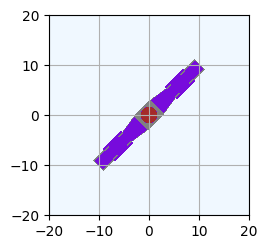

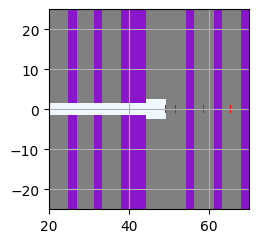

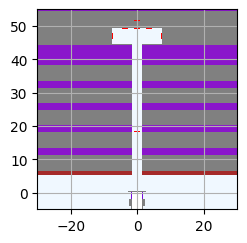

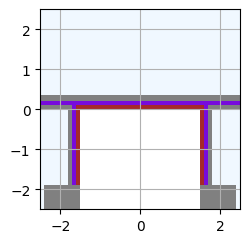

In [11]:
# # temporary solution for plotting
# import os
# os.environ['OPENMC_CROSS_SECTIONS'] = r'/home/segantin/openmc_models/CROSS_SECTIONS/endfb80_hdf5/cross_sections.xml'

# plot geometry

universe.plot(basis='xz', width=[40, 40], origin=[0, 0, 0], pixels=[200, 200], color_by='material', colors={air:'aliceblue', aisi316:'grey', copper:'brown', act_foil:'red', act_foil_box:'red'})
plt.grid()
# plt.savefig("room_xz.png", format="png", dpi=1200)
plt.show()

universe.plot(basis='yz', width=[50, 50], origin=[0, 45, 0], pixels=[200, 200], color_by='material', colors={air:'aliceblue', aisi316:'grey', copper:'brown', act_foil:'red', act_foil_box:'red'})
plt.grid()
# plt.savefig("room_yz.png", format="png", dpi=1200)
plt.show()

universe.plot(basis='xy', width=[60, 60], origin=[0, 25, 0], pixels=[200, 200], color_by='material', colors={air:'aliceblue', aisi316:'grey', copper:'brown', act_foil:'red', act_foil_box:'red'})
plt.grid()
# plt.savefig("room_xy.png", format="png", dpi=1200)


universe.plot(basis='xy', width=[5, 5], origin=[0, 0, 0], pixels=[200, 200], color_by='material', colors={air:'aliceblue', aisi316:'grey', copper:'brown', act_foil:'red', act_foil_box:'red'})
plt.grid()
# plt.savefig("room_xy.png", format="png", dpi=1200)

In [12]:
# TALLIES
#
# filters
# particle filters
neutron_filter = openmc.ParticleFilter('neutron')
photon_filter = openmc.ParticleFilter('photon')
particle_filter = openmc.ParticleFilter(['neutron', 'photon', 'electron', 'positron'])

# # mesh filters
# # create a mesh for the mesh tally
# mesh = openmc.RegularMesh()
# mesh.dimension = []
# mesh.lower_left = []
# mesh.upper_right = [300, 300, 400]
# # create a mesh filter
# mesh_filter = openmc.MeshFilter(mesh)

# cell filters
detector_cell_filter = openmc.CellFilter([cell_135, cell_158, cell_181, cell_204, cell_605, cell_606, cell_607, cell_608, 
                                        cell_609, cell_610, cell_611, cell_612, cell_602, cell_603, cell_604, cell_239, 
                                        cell_262, cell_285, cell_308, cell_331, cell_363, cell_386, cell_398])

mcnp_energy_filter = openmc.EnergyFilter(np.array([9.6164e-01, 1.0026e+00, 1.1080e+00, 1.1648e+00, 1.2246e+00, 1.2873e+00,
                                        1.3534e+00, 1.4227e+00, 1.4957e+00, 1.5724e+00, 1.6530e+00, 1.7377e+00, 1.8268e+00,
                                        1.9205e+00, 2.0190e+00, 2.1225e+00, 2.2313e+00, 2.3069e+00, 2.3457e+00, 2.3653e+00,
                                        2.3852e+00, 2.4660e+00, 2.5924e+00, 2.7253e+00, 2.8650e+00, 3.0119e+00, 3.1664e+00,
                                        3.3287e+00, 3.6788e+00, 4.0657e+00, 4.4933e+00, 4.7237e+00, 4.9659e+00, 5.2205e+00,
                                        5.4881e+00, 5.7695e+00, 6.0653e+00, 6.3763e+00, 6.5924e+00, 6.7032e+00, 7.0469e+00,
                                        7.4082e+00, 7.7880e+00, 8.1873e+00, 8.6071e+00, 9.0484e+00, 9.5123e+00, 1.0000e+01,
                                        1.0513e+01, 1.1052e+01, 1.1618e+01, 1.2214e+01, 1.2523e+01, 1.2840e+01, 1.3499e+01,
                                        1.3840e+01, 1.4191e+01, 1.4550e+01, 1.4918e+01, 16]))

In [13]:
# tallies
# instantiate a tally file
tallies_file = openmc.Tallies()

# cell tally - reaction rates at detector02
tally101 = openmc.Tally(tally_id=101, name='detector_reaction_rate')
tally101.filters = [detector_cell_filter]
tally101.scores = ['(n,2n)', '(n,a)', '(n,p)', '(n,gamma)']
tally101.nuclides = ['Nb93', 'Al27', 'Ni58', 'Au197']
# tally.estimator = 'collision'

tally102 = openmc.Tally(tally_id=102, name='heating_dose')
tally102.filters = [detector_cell_filter, particle_filter]
tally102.scores = ['heating']

tally103 = openmc.Tally(tally_id=103, name='damage_dose')
tally103.filters = [detector_cell_filter]
tally103.scores = ['damage-energy']

# export
tallies = openmc.Tallies([tally101, tally102, tally103])

tallies.export_to_xml()

In [14]:
# source definition
# fng source
fng_center = (0, 0, 0)
if off_axis == True:
    fng_center = (-5.3, 0, 0)
    
fng_uvw = (0, 1, 0)

my_fng_source = fng_source_froutine.fng_source(center=fng_center, reference_uvw=fng_uvw)  # from routine

# settings
settings_file = openmc.Settings()
settings_file.photon_transport = False
settings_file.run_mode = 'fixed source'
# settings_file.weight_windows = ww
settings_file.source = my_fng_source
settings_file.batches = 10
settings_file.particles = 10_000_000

# export to XML
settings_file.export_to_xml()

In [15]:
# run

openmc.run(threads=16)

                                %%%%%%%%%%%%%%%
                           %%%%%%%%%%%%%%%%%%%%%%%%
                        %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                      %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                    %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                   %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                                    %%%%%%%%%%%%%%%%%%%%%%%%
                                     %%%%%%%%%%%%%%%%%%%%%%%%
                 ###############      %%%%%%%%%%%%%%%%%%%%%%%%
                ##################     %%%%%%%%%%%%%%%%%%%%%%%
                ###################     %%%%%%%%%%%%%%%%%%%%%%%
                ####################     %%%%%%%%%%%%%%%%%%%%%%
                #####################     %%%%%%%%%%%%%%%%%%%%%
                ######################     %%%%%%%%%%%%%%%%%%%%
                #######################     %%%%%%%%%%%%%%%%%%
                 #######################     %%%%%%%%%%%%%%%%%
                 #####################